## Spike Challenge Precio
### Franco Betteo

In [1]:
# Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import utils

In [2]:
pd.set_option('display.max_columns', 100)

In [3]:
%load_ext autoreload
%autoreload 2

### 1. Datos
TODO: better display

In [4]:
precipitaciones = pd.read_csv("precipitaciones.csv")
precipitaciones.head()

,date,Coquimbo,Valparaiso,Metropolitana_de_Santiago,Libertador_Gral__Bernardo_O_Higgins,Maule,Biobio,La_Araucania,Los_Rios
0,1989-02-01,0.719033,0.117045,0.028272,0.0,0.724667,9.172945,22.595834,52.268010
1,1998-10-01,0.065216,0.000000,0.011493,0.0,0.008968,2.089674,14.702087,45.142041
2,2001-02-01,2.030026,0.047987,0.002634,0.0,0.032163,10.768351,29.465057,65.571098
3,2008-11-01,0.622784,0.000000,0.015872,0.0,1.734168,25.083557,64.901645,113.093488
4,2009-04-01,0.008065,0.000000,0.009396,0.0,12.080715,56.233424,96.364235,155.622235


In [5]:
banco_central = pd.read_csv("banco_central.csv")
banco_central.head()

,Periodo,Imacec_empalmado,Imacec_produccion_de_bienes,Imacec_minero,Imacec_industria,Imacec_resto_de_bienes,Imacec_comercio,Imacec_servicios,Imacec_a_costo_de_factores,Imacec_no_minero,PIB_Agropecuario_silvicola,PIB_Pesca,PIB_Mineria,PIB_Mineria_del_cobre,PIB_Otras_actividades_mineras,PIB_Industria_Manufacturera,PIB_Alimentos,PIB_Bebidas_y_tabaco,PIB_Textil,PIB_Maderas_y_muebles,PIB_Celulosa,PIB_Refinacion_de_petroleo,PIB_Quimica,PIB_Minerales_no_metalicos_y_metalica_basica,PIB_Productos_metalicos,PIB_Electricidad,PIB_Construccion,PIB_Comercio,PIB_Restaurantes_y_hoteles,PIB_Transporte,PIB_Comunicaciones,PIB_Servicios_financieros,PIB_Servicios_empresariales,PIB_Servicios_de_vivienda,PIB_Servicios_personales,PIB_Administracion_publica,PIB_a_costo_de_factores,Impuesto_al_valor_agregado,Derechos_de_Importacion,PIB,Precio_de_la_gasolina_en_EEUU_dolaresm3,Precio_de_la_onza_troy_de_oro_dolaresoz,Precio_de_la_onza_troy_de_plata_dolaresoz,Precio_del_cobre_refinado_BML_dolareslibra,Precio_del_diesel_centavos_de_dolargalon,Precio_del_gas_natural_dolaresmillon_de_unidades_termicas_britanicas,Precio_del_petroleo_Brent_dolaresbarril,Precio_del_kerosene_dolaresm3,Precio_del_petroleo_WTI_dolaresbarril,Precio_del_propano_centavos_de_dolargalon_DTN,Tipo_de_cambio_del_dolar_observado_diario,Ocupados,Ocupacion_en_Agricultura_INE,Ocupacion_en_Explotacion_de_minas_y_canteras_INE,Ocupacion_en_Industrias_manufactureras_INE,Ocupacion_en_Suministro_de_electricidad_INE,Ocupacion_en_Actividades_de_servicios_administrativos_y_de_apoyo_INE,Ocupacion_en_Actividades_profesionales_INE,Ocupacion_en_Actividades_inmobiliarias_INE,Ocupacion_en_Actividades_financieras_y_de_seguros_INE,Ocupacion_en_Informacion_y_comunicaciones_INE,Ocupacion_en_Transporte_y_almacenamiento_INE,Ocupacion_en_Actividades_de_alojamiento_y_de_servicio_de_comidas_INE,Ocupacion_en_Construccion_INE,Ocupacion_en_Comercio_INE,Ocupacion_en_Suministro_de_agua_evacuacion_de_aguas_residuales_INE,Ocupacion_en_Administracion_publica_y_defensa_INE,Ocupacion_en_Enseanza_INE,Ocupacion_en_Actividades_de_atencion_de_la_salud_humana_y_de_asistencia_social_INE,Ocupacion_en_Actividades_artisticas_INE,Ocupacion_en_Otras_actividades_de_servicios_INE,Ocupacion_en_Actividades_de_los_hogares_como_empleadores_INE,Ocupacion_en_Actividades_de_organizaciones_y_organos_extraterritoriales_INE,No_sabe__No_responde_Miles_de_personas,Tipo_de_cambio_nominal_multilateral___TCM,Indice_de_tipo_de_cambio_real___TCR_promedio_1986_100,Indice_de_produccion_industrial,Indice_de_produccion_industrial__mineria,Indice_de_produccion_industrial_electricidad__gas_y_agua,Indice_de_produccion_industrial__manufacturera,Generacion_de_energia_electrica_CDEC_GWh,Indice_de_ventas_comercio_real_IVCM,Indice_de_ventas_comercio_real_no_durables_IVCM,Indice_de_ventas_comercio_real_durables_IVCM,Ventas_autos_nuevos
0,2013-03-01 00:00:00 UTC,102.796.218,10.546.824,978.554.365,102.297.537,114.994.919,110.729.395,100.064.328,103.163.651,103.405.852,579.846.819,570.624.122,123.491.343,110.356.254,131.350.889,130.648.285,367.818.436,162.692.807,330.305.467,643.366.109,974.948.182,103.469.519,184.460.073,807.709.837,212.409.058,301.314.934,710.242.818,115.489.064,202.838.669,546.694.889,337.915.263,5.691.837,11.393.886,793.471.519,140.103.913,512.994.015,108.482.797,896.688.023,659.936.009,118.109.613,7.638.022,1593.60,288.157,347.586.864,301.11,3.8117,109.24,76.520.246,92.91,89.171,472.484,799.068.585,798.092.771,258.428.756,901.504.814,360.108.494,18.951.548,229.653.619,547.033.124,19.153.327,155.736.824,498.854.717,341.857.582,682.423.108,151.916.628,349.444.258,445.435.266,587.837.412,362.517.856,82.567.788,201.875.908,416.124.956,190.085.519,NaN,93.621,865.903.468,102.761.705,98.915.705,NaN,108.387.837,580.480.672,NaN,NaN,NaN,28577.0
1,2013-04-01 00:00:00 UTC,101.664.842,999.272.757,927.333.293,104.485.589,102.199.311,106.098.291,102.600.107,101.937.319,102.766.884,374.895.706,606.504.665,11.702.736,10.358.806,134.393.001,133.442.735,38.211.344,188.

### 2. Análisis de datos. Creación de variables

#### Precipitaciones

In [6]:
precipitaciones['date'] = pd.to_datetime(precipitaciones.date)
precipitaciones['anio'] = precipitaciones.date.dt.year
precipitaciones['mes'] = precipitaciones.date.dt.month
precipitaciones.drop_duplicates(inplace=True)
precipitaciones.describe()

,Coquimbo,Valparaiso,Metropolitana_de_Santiago,Libertador_Gral__Bernardo_O_Higgins,Maule,Biobio,La_Araucania,Los_Rios,anio,mes
count,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000
mean,16.154691,32.450980,49.666682,72.249805,98.662773,128.113406,151.486456,199.451789,1999.169355,6.467742
std,32.629286,55.434330,74.361099,101.426112,122.766771,130.056094,126.628503,140.073615,11.945142,3.461617
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.001170,0.005331,0.748127,1979.000000,1.000000
25%,0.821521,1.538162,5.297546,5.343992,11.897363,29.356684,52.930343,89.805643,1989.000000,3.000000
50%,4.071036,9.037825,19.087592,25.995969,45.649888,79.558557,110.570990,159.467940,1999.000000,6.000000
75%,16.137600,38.409213,63.408364,101.875093,142.230716,184.751307,208.316243,274.594590,2009.250000,9.000000
max,347.133889,441.048604,524.592667,645.515752,759.177712,702.434707,661.211203,717.735673,2020.000000,12.000000


In [7]:
precipitaciones_long = pd.melt(precipitaciones.drop(columns=['anio', 'mes']), id_vars="date", var_name="region", value_name="precipitaciones")

In [8]:
descripcion_precipitaciones = precipitaciones_long.groupby("region").agg({'date': ['min', 'max', 'count'],
                                                           'precipitaciones': ['min', 'max', 'mean', 'median', utils.count_na]
                                                            })
descripcion_precipitaciones.columns = ["_".join(pair) for pair in descripcion_precipitaciones.columns]
descripcion_precipitaciones.reset_index()                                                    

,region,date_min,date_max,date_count,precipitaciones_min,precipitaciones_max,precipitaciones_mean,precipitaciones_median,precipitaciones_count_na
0,Biobio,1979-01-01,2020-04-01,496,0.001170,702.434707,128.113406,79.558557,0
1,Coquimbo,1979-01-01,2020-04-01,496,0.000000,347.133889,16.154691,4.071036,0
2,La_Araucania,1979-01-01,2020-04-01,496,0.005331,661.211203,151.486456,110.570990,0
3,Libertador_Gral__Bernardo_O_Higgins,1979-01-01,2020-04-01,496,0.000000,645.515752,72.249805,25.995969,0
4,Los_Rios,1979-01-01,2020-04-01,496,0.748127,717.735673,199.451789,159.467940,0
5,Maule,1979-01-01,2020-04-01,496,0.000000,759.177712,98.662773,45.649888,0
6,Metropolitana_de_Santiago,1979-01-01,2020-04-01,496,0.000000,524.592667,49.666682,19.087592,0
7,Valparaiso,1979-01-01,2020-04-01,496,0.000000,441.048604,32.450980,9.037825,0


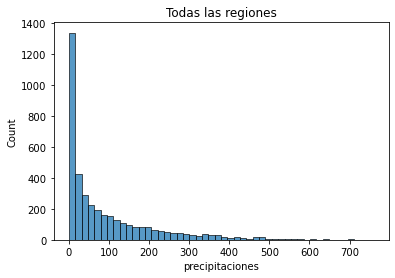

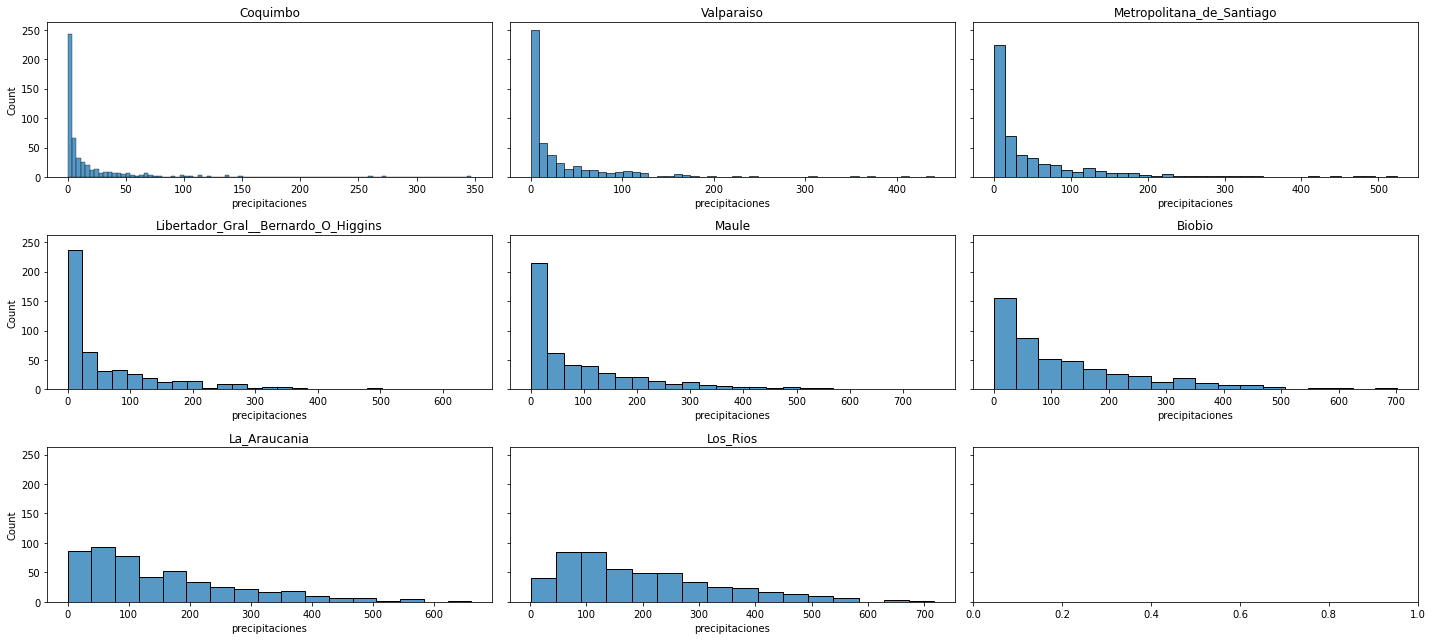

In [9]:
utils.plot_hist_precipitaciones(precipitaciones_long)
plt.title("Todas las regiones")

fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(20,9), sharey=True)
ax = ax.flatten()

for i, region in enumerate(precipitaciones_long.region.unique()):
    utils.plot_hist_precipitaciones(precipitaciones_long, region=region, ax=ax[i])
    ax[i].set_title(region)
plt.tight_layout()

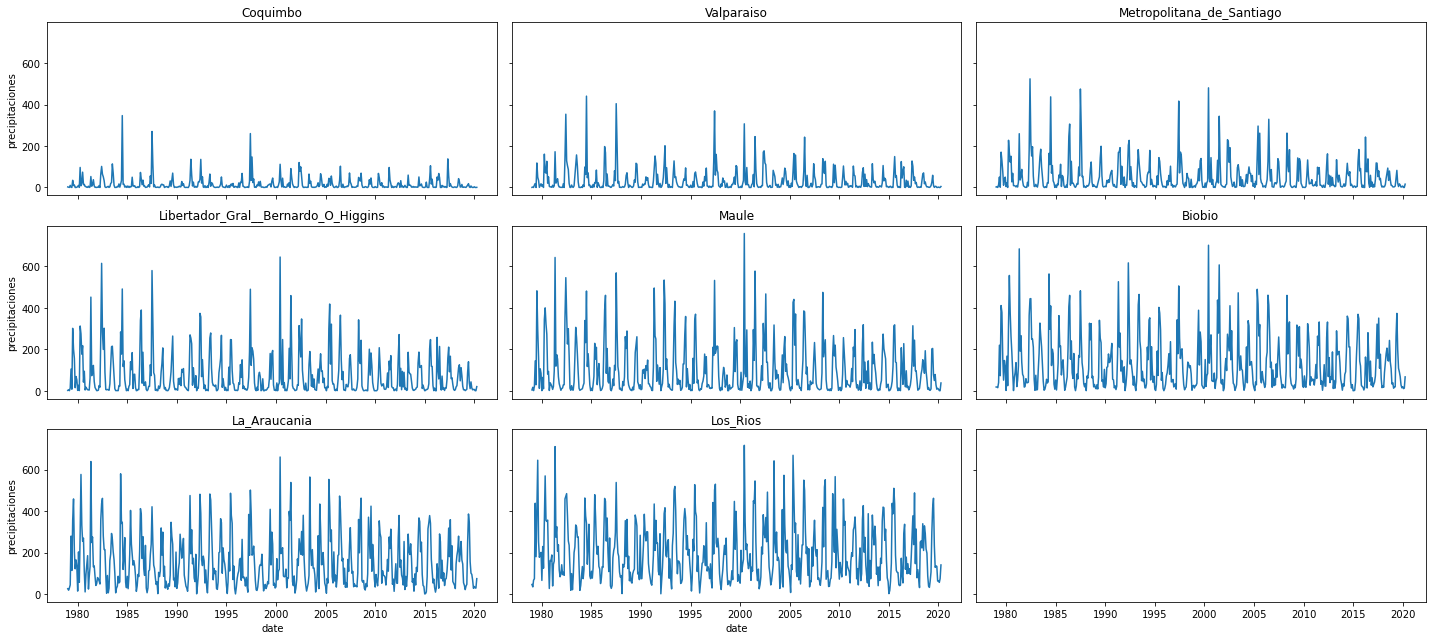

In [10]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(20,9), sharex=True, sharey=True)
ax = ax.flatten()

for i, region in enumerate(precipitaciones_long.region.unique()):
    utils.plot_simple_precipitaciones(precipitaciones_long, region=region, ax=ax[i])
    ax[i].set_title(region)
plt.tight_layout()

#### Banco Central

In [11]:
banco_central_clean = banco_central.copy(deep=True)
banco_central_clean.head()

,Periodo,Imacec_empalmado,Imacec_produccion_de_bienes,Imacec_minero,Imacec_industria,Imacec_resto_de_bienes,Imacec_comercio,Imacec_servicios,Imacec_a_costo_de_factores,Imacec_no_minero,PIB_Agropecuario_silvicola,PIB_Pesca,PIB_Mineria,PIB_Mineria_del_cobre,PIB_Otras_actividades_mineras,PIB_Industria_Manufacturera,PIB_Alimentos,PIB_Bebidas_y_tabaco,PIB_Textil,PIB_Maderas_y_muebles,PIB_Celulosa,PIB_Refinacion_de_petroleo,PIB_Quimica,PIB_Minerales_no_metalicos_y_metalica_basica,PIB_Productos_metalicos,PIB_Electricidad,PIB_Construccion,PIB_Comercio,PIB_Restaurantes_y_hoteles,PIB_Transporte,PIB_Comunicaciones,PIB_Servicios_financieros,PIB_Servicios_empresariales,PIB_Servicios_de_vivienda,PIB_Servicios_personales,PIB_Administracion_publica,PIB_a_costo_de_factores,Impuesto_al_valor_agregado,Derechos_de_Importacion,PIB,Precio_de_la_gasolina_en_EEUU_dolaresm3,Precio_de_la_onza_troy_de_oro_dolaresoz,Precio_de_la_onza_troy_de_plata_dolaresoz,Precio_del_cobre_refinado_BML_dolareslibra,Precio_del_diesel_centavos_de_dolargalon,Precio_del_gas_natural_dolaresmillon_de_unidades_termicas_britanicas,Precio_del_petroleo_Brent_dolaresbarril,Precio_del_kerosene_dolaresm3,Precio_del_petroleo_WTI_dolaresbarril,Precio_del_propano_centavos_de_dolargalon_DTN,Tipo_de_cambio_del_dolar_observado_diario,Ocupados,Ocupacion_en_Agricultura_INE,Ocupacion_en_Explotacion_de_minas_y_canteras_INE,Ocupacion_en_Industrias_manufactureras_INE,Ocupacion_en_Suministro_de_electricidad_INE,Ocupacion_en_Actividades_de_servicios_administrativos_y_de_apoyo_INE,Ocupacion_en_Actividades_profesionales_INE,Ocupacion_en_Actividades_inmobiliarias_INE,Ocupacion_en_Actividades_financieras_y_de_seguros_INE,Ocupacion_en_Informacion_y_comunicaciones_INE,Ocupacion_en_Transporte_y_almacenamiento_INE,Ocupacion_en_Actividades_de_alojamiento_y_de_servicio_de_comidas_INE,Ocupacion_en_Construccion_INE,Ocupacion_en_Comercio_INE,Ocupacion_en_Suministro_de_agua_evacuacion_de_aguas_residuales_INE,Ocupacion_en_Administracion_publica_y_defensa_INE,Ocupacion_en_Enseanza_INE,Ocupacion_en_Actividades_de_atencion_de_la_salud_humana_y_de_asistencia_social_INE,Ocupacion_en_Actividades_artisticas_INE,Ocupacion_en_Otras_actividades_de_servicios_INE,Ocupacion_en_Actividades_de_los_hogares_como_empleadores_INE,Ocupacion_en_Actividades_de_organizaciones_y_organos_extraterritoriales_INE,No_sabe__No_responde_Miles_de_personas,Tipo_de_cambio_nominal_multilateral___TCM,Indice_de_tipo_de_cambio_real___TCR_promedio_1986_100,Indice_de_produccion_industrial,Indice_de_produccion_industrial__mineria,Indice_de_produccion_industrial_electricidad__gas_y_agua,Indice_de_produccion_industrial__manufacturera,Generacion_de_energia_electrica_CDEC_GWh,Indice_de_ventas_comercio_real_IVCM,Indice_de_ventas_comercio_real_no_durables_IVCM,Indice_de_ventas_comercio_real_durables_IVCM,Ventas_autos_nuevos
0,2013-03-01 00:00:00 UTC,102.796.218,10.546.824,978.554.365,102.297.537,114.994.919,110.729.395,100.064.328,103.163.651,103.405.852,579.846.819,570.624.122,123.491.343,110.356.254,131.350.889,130.648.285,367.818.436,162.692.807,330.305.467,643.366.109,974.948.182,103.469.519,184.460.073,807.709.837,212.409.058,301.314.934,710.242.818,115.489.064,202.838.669,546.694.889,337.915.263,5.691.837,11.393.886,793.471.519,140.103.913,512.994.015,108.482.797,896.688.023,659.936.009,118.109.613,7.638.022,1593.60,288.157,347.586.864,301.11,3.8117,109.24,76.520.246,92.91,89.171,472.484,799.068.585,798.092.771,258.428.756,901.504.814,360.108.494,18.951.548,229.653.619,547.033.124,19.153.327,155.736.824,498.854.717,341.857.582,682.423.108,151.916.628,349.444.258,445.435.266,587.837.412,362.517.856,82.567.788,201.875.908,416.124.956,190.085.519,NaN,93.621,865.903.468,102.761.705,98.915.705,NaN,108.387.837,580.480.672,NaN,NaN,NaN,28577.0
1,2013-04-01 00:00:00 UTC,101.664.842,999.272.757,927.333.293,104.485.589,102.199.311,106.098.291,102.600.107,101.937.319,102.766.884,374.895.706,606.504.665,11.702.736,10.358.806,134.393.001,133.442.735,38.211.344,188.

In [12]:
print(f'Una primera inspección nos muestra que el dataframe tiene {banco_central_clean.shape[0]} filas y {banco_central_clean.shape[1]} columnas.\n\
Vemos que las cifras tienen separaciones de a miles por puntos y eso genera que pandas lo lea como Strings. Removemos los puntos e intentamos convertir a float, lo cual devuelve un error por encontrar caracteres "a" entre los valores. Cambiamos todos los caracteres por NaN y ahora si podemos convertir a Float, que a su vez transforma las celdas vacías en NaN.\n\
Al querer crear las variables de año y mes que luego nos van a servir para cruzar con el archivo que contiene el precio de la leche nos encontramos con que existe un mes "13". Luego de una inspección vemos que corresponde al 12 de ese año y es el único valor fuera del rango esperado.')


Una primera inspección nos muestra que el dataframe tiene 614 filas y 85 columnas.
Vemos que las cifras tienen separaciones de a miles por puntos y eso genera que pandas lo lea como Strings. Removemos los puntos e intentamos convertir a float, lo cual devuelve un error por encontrar caracteres "a" entre los valores. Cambiamos todos los caracteres por NaN y ahora si podemos convertir a Float, que a su vez transforma las celdas vacías en NaN.
Al querer crear las variables de año y mes que luego nos van a servir para cruzar con el archivo que contiene el precio de la leche nos encontramos con que existe un mes "13". Luego de una inspección vemos que corresponde al 12 de ese año y es el único valor fuera del rango esperado.


In [13]:


# remover separador de miles con punto (excepto Periodo)
banco_central_clean = banco_central.apply(lambda x: x.astype('str').str.replace("\.","", regex=True) if x.name in banco_central.columns[1:] else x)
# reemplazar caracteres por Nan  (excepto Periodo)
banco_central_clean = banco_central_clean.apply(lambda x: x.astype('str').str.replace("[a-zA-Z]+","NaN", regex=True) if x.name in banco_central.columns[1:] else x)
# convierto a numerico, Nan en los vacíos
banco_central_clean = banco_central_clean.apply(lambda x: x.astype('float') if x.name in banco_central.columns[1:] else x)
# fix de mes 13 en 2020, deberia ser 12
banco_central_clean['Periodo'] = np.where(banco_central_clean['Periodo']=="2020-13-01 00:00:00 UTC", "2020-12-01 00:00:00 UTC", banco_central_clean['Periodo'])
banco_central_clean['Periodo'] = pd.to_datetime(banco_central_clean.Periodo).dt.date
banco_central_clean['anio'] = pd.to_datetime(banco_central_clean.Periodo).dt.year
banco_central_clean['mes'] = pd.to_datetime(banco_central_clean.Periodo).dt.month
banco_central_clean.sort_values('Periodo', inplace=True)

banco_central_clean.drop_duplicates(inplace=True)

In [14]:
resumen = banco_central_clean.apply(['min', 'max', 'mean', lambda x: x.isna().sum()/len(x)], 0).reset_index()
resumen['index'][3] = "proporcion_NA" 
resumen

<ipython-input-14-7bb15984067e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resumen['index'][3] = "proporcion_NA"


,index,Periodo,Imacec_empalmado,Imacec_produccion_de_bienes,Imacec_minero,Imacec_industria,Imacec_resto_de_bienes,Imacec_comercio,Imacec_servicios,Imacec_a_costo_de_factores,Imacec_no_minero,PIB_Agropecuario_silvicola,PIB_Pesca,PIB_Mineria,PIB_Mineria_del_cobre,PIB_Otras_actividades_mineras,PIB_Industria_Manufacturera,PIB_Alimentos,PIB_Bebidas_y_tabaco,PIB_Textil,PIB_Maderas_y_muebles,PIB_Celulosa,PIB_Refinacion_de_petroleo,PIB_Quimica,PIB_Minerales_no_metalicos_y_metalica_basica,PIB_Productos_metalicos,PIB_Electricidad,PIB_Construccion,PIB_Comercio,PIB_Restaurantes_y_hoteles,PIB_Transporte,PIB_Comunicaciones,PIB_Servicios_financieros,PIB_Servicios_empresariales,PIB_Servicios_de_vivienda,PIB_Servicios_personales,PIB_Administracion_publica,PIB_a_costo_de_factores,Impuesto_al_valor_agregado,Derechos_de_Importacion,PIB,Precio_de_la_gasolina_en_EEUU_dolaresm3,Precio_de_la_onza_troy_de_oro_dolaresoz,Precio_de_la_onza_troy_de_plata_dolaresoz,Precio_del_cobre_refinado_BML_dolareslibra,Precio_del_diesel_centavos_de_dolargalon,Precio_del_gas_natural_dolaresmillon_de_unidades_termicas_britanicas,Precio_del_petroleo_Brent_dolaresbarril,Precio_del_kerosene_dolaresm3,Precio_del_petroleo_WTI_dolaresbarril,Precio_del_propano_centavos_de_dolargalon_DTN,Tipo_de_cambio_del_dolar_observado_diario,Ocupados,Ocupacion_en_Agricultura_INE,Ocupacion_en_Explotacion_de_minas_y_canteras_INE,Ocupacion_en_Industrias_manufactureras_INE,Ocupacion_en_Suministro_de_electricidad_INE,Ocupacion_en_Actividades_de_servicios_administrativos_y_de_apoyo_INE,Ocupacion_en_Actividades_profesionales_INE,Ocupacion_en_Actividades_inmobiliarias_INE,Ocupacion_en_Actividades_financieras_y_de_seguros_INE,Ocupacion_en_Informacion_y_comunicaciones_INE,Ocupacion_en_Transporte_y_almacenamiento_INE,Ocupacion_en_Actividades_de_alojamiento_y_de_servicio_de_comidas_INE,Ocupacion_en_Construccion_INE,Ocupacion_en_Comercio_INE,Ocupacion_en_Suministro_de_agua_evacuacion_de_aguas_residuales_INE,Ocupacion_en_Administracion_publica_y_defensa_INE,Ocupacion_en_Enseanza_INE,Ocupacion_en_Actividades_de_atencion_de_la_salud_humana_y_de_asistencia_social_INE,Ocupacion_en_Actividades_artisticas_INE,Ocupacion_en_Otras_actividades_de_servicios_INE,Ocupacion_en_Actividades_de_los_hogares_como_empleadores_INE,Ocupacion_en_Actividades_de_organizaciones_y_organos_extraterritoriales_INE,No_sabe__No_responde_Miles_de_personas,Tipo_de_cambio_nominal_multilateral___TCM,Indice_de_tipo_de_cambio_real___TCR_promedio_1986_100,Indice_de_produccion_industrial,Indice_de_produccion_industrial__mineria,Indice_de_produccion_industrial_electricidad__gas_y_agua,Indice_de_produccion_industrial__manufacturera,Generacion_de_energia_electrica_CDEC_GWh,Indice_de_ventas_comercio_real_IVCM,Indice_de_ventas_comercio_real_no_durables_IVCM,Indice_de_ventas_comercio_real_durables_IVCM,Ventas_autos_nuevos,anio,mes
0,min,1970-01-01,5.296994e+06,1.014872e+06,1.010200e+07,1.032193e+06,1.027326e+06,4.237199e+06,7.563720e+05,9.371354e+06,9.043380e+05,1.586778e+07,1.039671e+07,1.271215e+06,1.035881e+07,1.292978e+06,1.358560e+05,3.005438e+06,1.739666e+06,2.477710e+07,6.407887e+06,1.008940e+05,9.841677e+06,1.690736e+06,6.502213e+06,1.995621e+07,2.808115e+06,1.072958e+07,1.118740e+05,2.525630e+05,6.350730e+05,4.420184e+06,5.691837e+06,1.139389e+07,8.045511e+07,1.157557e+07,5.196854e+06,1.158010e+05,9.452492e+06,5.852693e+06,1.108406e+07,9.900000e+01,401.000000,15.000000,1.000000e+00,1334.000000,26.000000,186.000000,4.346090e+05,113.000000,450.000000,4.701000e+03,8.156196e+06,6.251775e+07,2.630406e+06,7.456535e+07,3.516149e+07,2.165196e+06,2.933080e+05,6.865296e+06,1.656582e+06,1.453648e+07,5.036122e+07,3.304888e+06,6.859292e+07,1.561431e+06,3.966499e+07,4.672877e+06,7.420130e+05,3.614386e+07,1.036809e+07,2.124974e+07,3.661411e+06,0.000000e+00,2.616955e+07,1.205000e+03,1.094737e+06,1.000880e+07,9.475840e+05,1.023349e+07,7.480450e+05,6.107000e+03,1.014057e+06,1.009480e+05,1.007317e+07,46580.000000,1970.0,1.0
1,max,2020-12-01,9.998748e+08,9.992

Vemos que la mayoría de las columnas tienen una gran proporción de datos faltantes (mas del 50%) salvo algunas excepciones como 'Precio de la gasolina' o 'Precio de la onza de oro'. Se ve en los plots posteriores que esto se debe a que muchas series solo tienen valores a partir de determinada fecha (que varía tipo de variable).  
Las escalas de algunas variables son llamativas y probablemente los puntos separadores que venían en la data inicial no indicaban nada en esos casos. Por ejemplo para las variables Índice vemos valores de cientos de miles y hasta millones cuando son variables que toman base 100 en algún período y se actualizan con las variaciones porcentuales. Valores tan elevados corresponden a crecimientos inmensos respecto a la base.  
Se ve más claro en los gráficos más adelante pero el rango de muchas variables es llamativo con grandes picos y comportamientos extraños que podría deberse a outliers o escalas mezcladas dentro de una misma serie.



In [15]:
# Grupos de variables
set([x[0]  for x in banco_central_clean.columns.str.split("_")])

{'Derechos',
 'Generacion',
 'Imacec',
 'Impuesto',
 'Indice',
 'No',
 'Ocupacion',
 'Ocupados',
 'PIB',
 'Periodo',
 'Precio',
 'Tipo',
 'Ventas',
 'anio',
 'mes'}

#### Imacec

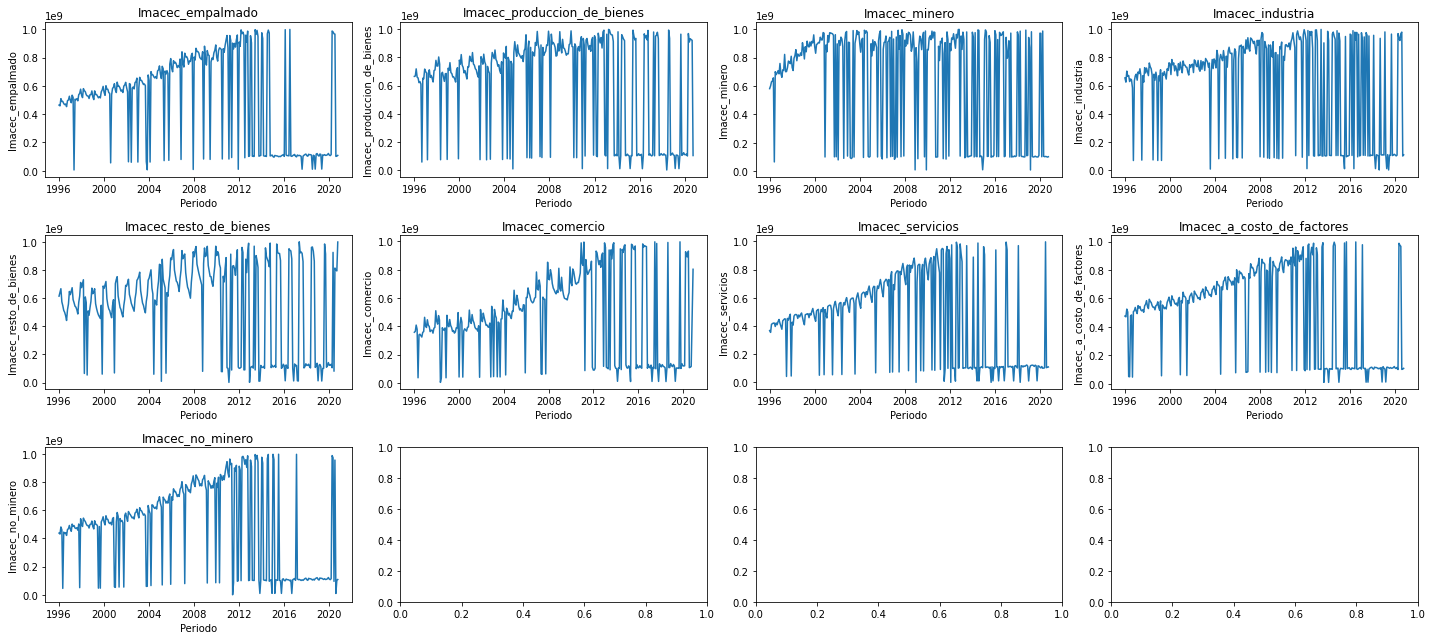

In [16]:

indice = banco_central_clean.columns.str.startswith("Imacec")
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(20,9))
ax = ax.flatten()

for i,col in  enumerate(banco_central_clean.columns[indice]):
    temp = banco_central_clean.loc[:, ['Periodo', col]].sort_values('Periodo')
    sns.lineplot(data=temp, x="Periodo", y=col, ax=ax[i])
    ax[i].set_title(col)

plt.tight_layout()

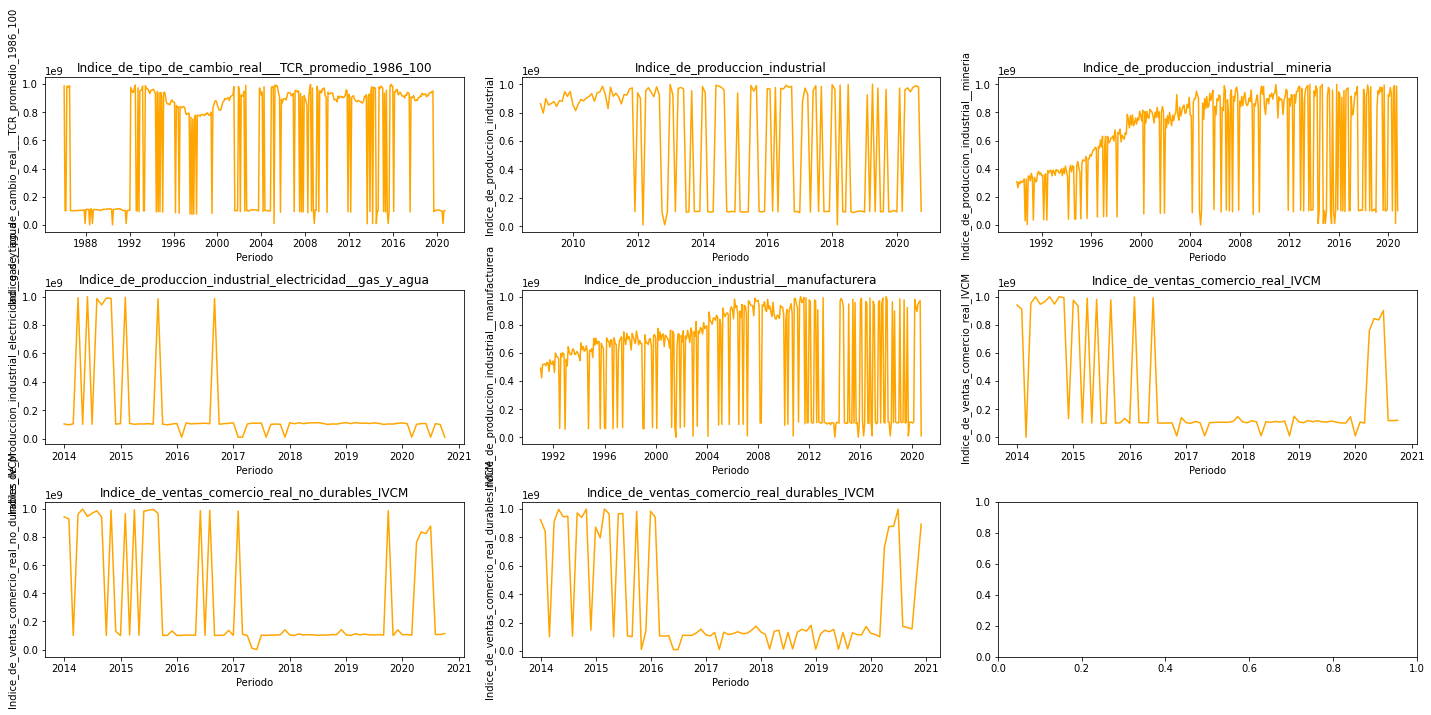

In [17]:
indice = banco_central_clean.columns.str.startswith("Indice")
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(20,9))
ax = ax.flatten()

for i,col in  enumerate(banco_central_clean.columns[indice]):
    temp = banco_central_clean.loc[:, ['Periodo', col]].sort_values('Periodo')
    sns.lineplot(data=temp, x="Periodo", y=col, ax=ax[i], color="orange")
    ax[i].set_title(col)

plt.tight_layout()

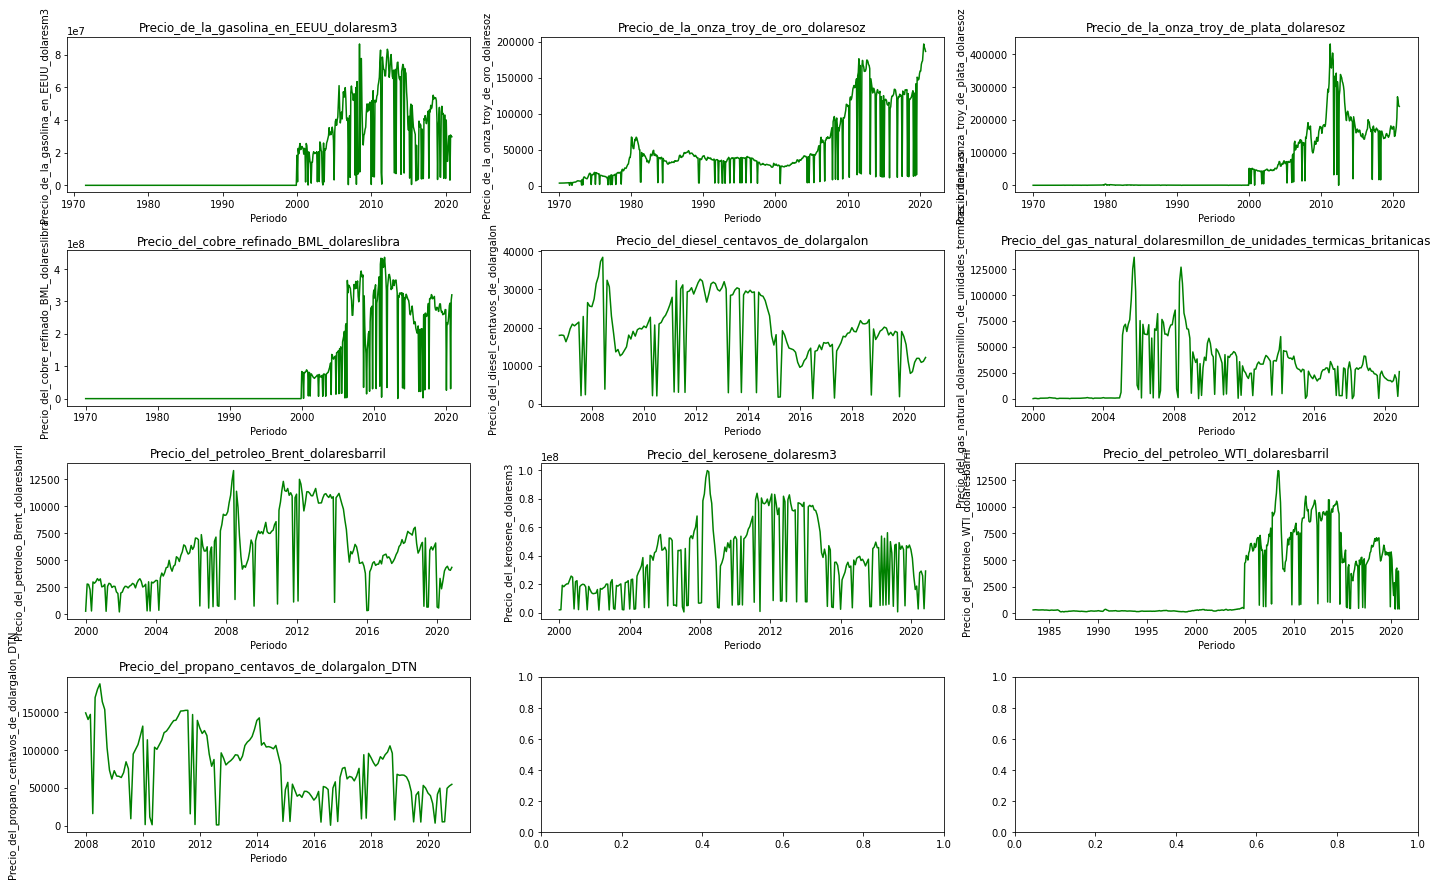

In [18]:
indice = banco_central_clean.columns.str.startswith("Precio")
fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(20,12))
ax = ax.flatten()

for i,col in  enumerate(banco_central_clean.columns[indice]):
    temp = banco_central_clean.loc[:, ['Periodo', col]].sort_values('Periodo')
    sns.lineplot(data=temp, x="Periodo", y=col, ax=ax[i], color="green")
    ax[i].set_title(col)

plt.tight_layout()

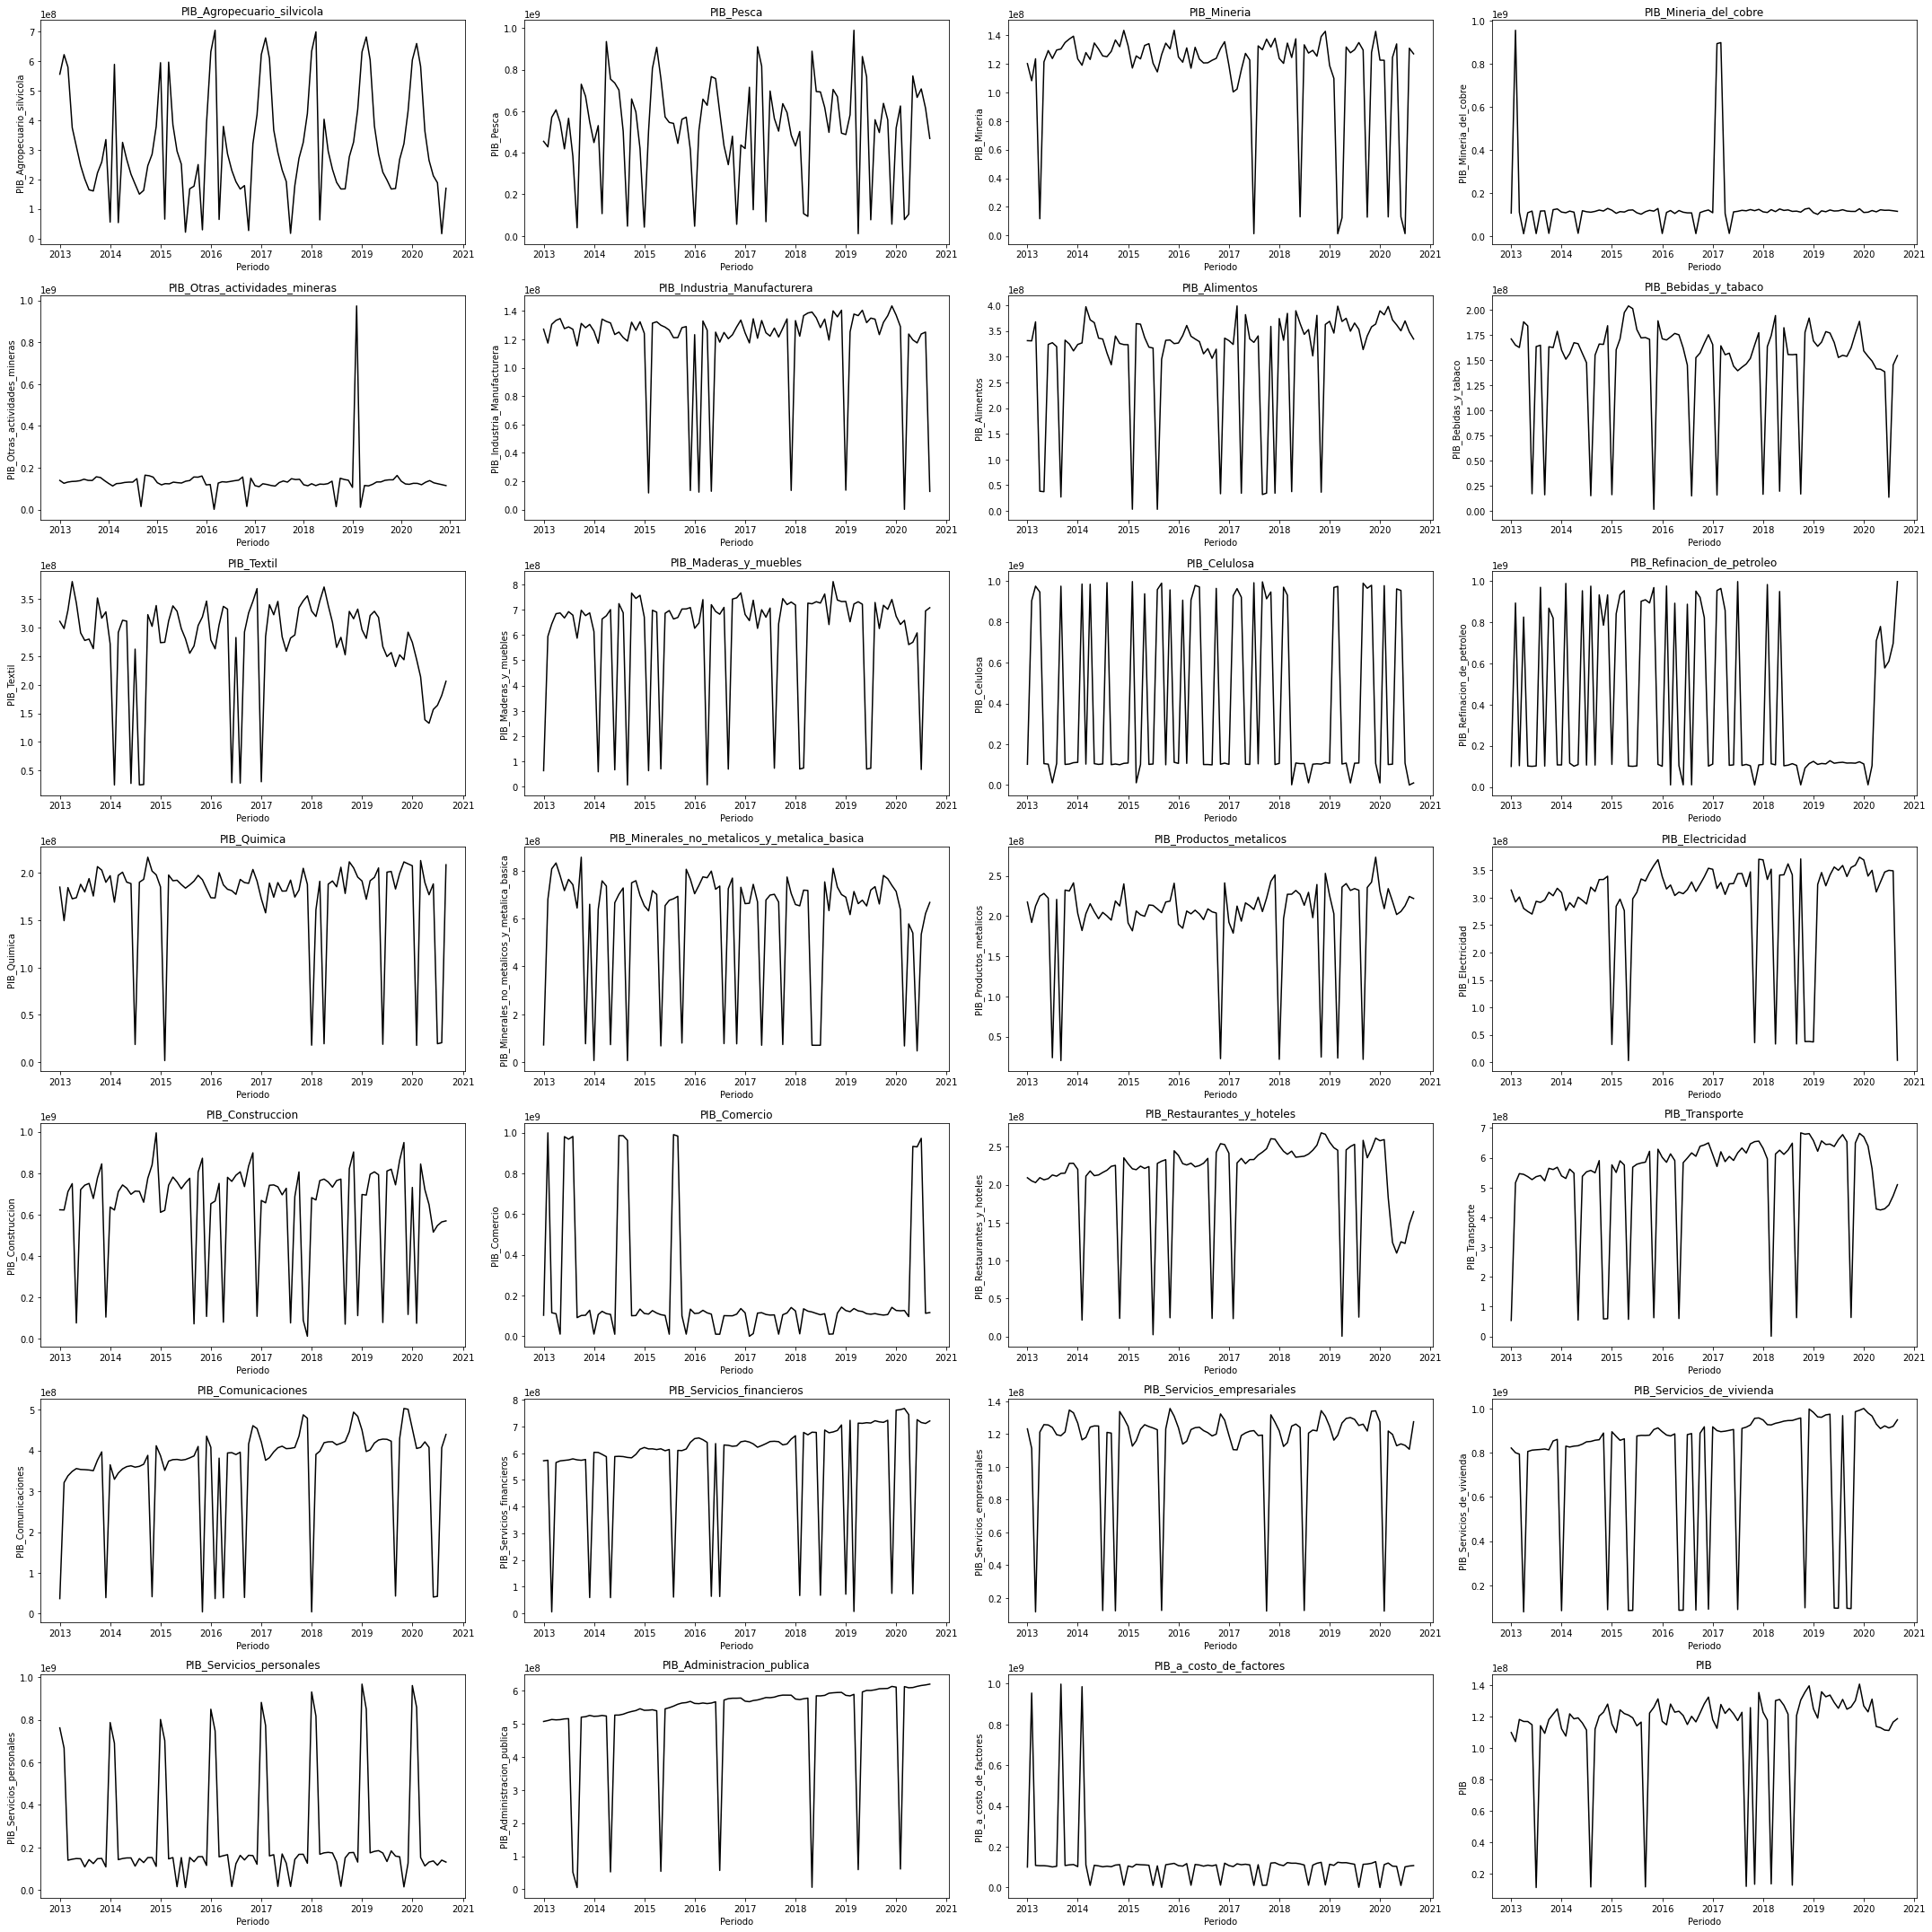

In [19]:
indice = banco_central_clean.columns.str.startswith("PIB")
fig, ax = plt.subplots(nrows=7, ncols=4, figsize=(30,30))
ax = ax.flatten()

for i,col in  enumerate(banco_central_clean.columns[indice]):
    temp = banco_central_clean.loc[:, ['Periodo', col]].sort_values('Periodo')
    sns.lineplot(data=temp, x="Periodo", y=col, ax=ax[i], color="black")
    ax[i].set_title(col)

plt.tight_layout()

In [20]:
# Generamos una version donde se rellenan NA con el primer valor válido anterior. No resuelve outliers pero si algunas suciedades del datasets. 
filled_dataset = banco_central_clean.fillna(method="ffill")

In [21]:
filled_dataset.query('anio >= 2013').apply(['min', 'max', 'mean', lambda x: x.isna().sum()/len(x)], 0).reset_index()


,index,Periodo,Imacec_empalmado,Imacec_produccion_de_bienes,Imacec_minero,Imacec_industria,Imacec_resto_de_bienes,Imacec_comercio,Imacec_servicios,Imacec_a_costo_de_factores,Imacec_no_minero,PIB_Agropecuario_silvicola,PIB_Pesca,PIB_Mineria,PIB_Mineria_del_cobre,PIB_Otras_actividades_mineras,PIB_Industria_Manufacturera,PIB_Alimentos,PIB_Bebidas_y_tabaco,PIB_Textil,PIB_Maderas_y_muebles,PIB_Celulosa,PIB_Refinacion_de_petroleo,PIB_Quimica,PIB_Minerales_no_metalicos_y_metalica_basica,PIB_Productos_metalicos,PIB_Electricidad,PIB_Construccion,PIB_Comercio,PIB_Restaurantes_y_hoteles,PIB_Transporte,PIB_Comunicaciones,PIB_Servicios_financieros,PIB_Servicios_empresariales,PIB_Servicios_de_vivienda,PIB_Servicios_personales,PIB_Administracion_publica,PIB_a_costo_de_factores,Impuesto_al_valor_agregado,Derechos_de_Importacion,PIB,Precio_de_la_gasolina_en_EEUU_dolaresm3,Precio_de_la_onza_troy_de_oro_dolaresoz,Precio_de_la_onza_troy_de_plata_dolaresoz,Precio_del_cobre_refinado_BML_dolareslibra,Precio_del_diesel_centavos_de_dolargalon,Precio_del_gas_natural_dolaresmillon_de_unidades_termicas_britanicas,Precio_del_petroleo_Brent_dolaresbarril,Precio_del_kerosene_dolaresm3,Precio_del_petroleo_WTI_dolaresbarril,Precio_del_propano_centavos_de_dolargalon_DTN,Tipo_de_cambio_del_dolar_observado_diario,Ocupados,Ocupacion_en_Agricultura_INE,Ocupacion_en_Explotacion_de_minas_y_canteras_INE,Ocupacion_en_Industrias_manufactureras_INE,Ocupacion_en_Suministro_de_electricidad_INE,Ocupacion_en_Actividades_de_servicios_administrativos_y_de_apoyo_INE,Ocupacion_en_Actividades_profesionales_INE,Ocupacion_en_Actividades_inmobiliarias_INE,Ocupacion_en_Actividades_financieras_y_de_seguros_INE,Ocupacion_en_Informacion_y_comunicaciones_INE,Ocupacion_en_Transporte_y_almacenamiento_INE,Ocupacion_en_Actividades_de_alojamiento_y_de_servicio_de_comidas_INE,Ocupacion_en_Construccion_INE,Ocupacion_en_Comercio_INE,Ocupacion_en_Suministro_de_agua_evacuacion_de_aguas_residuales_INE,Ocupacion_en_Administracion_publica_y_defensa_INE,Ocupacion_en_Enseanza_INE,Ocupacion_en_Actividades_de_atencion_de_la_salud_humana_y_de_asistencia_social_INE,Ocupacion_en_Actividades_artisticas_INE,Ocupacion_en_Otras_actividades_de_servicios_INE,Ocupacion_en_Actividades_de_los_hogares_como_empleadores_INE,Ocupacion_en_Actividades_de_organizaciones_y_organos_extraterritoriales_INE,No_sabe__No_responde_Miles_de_personas,Tipo_de_cambio_nominal_multilateral___TCM,Indice_de_tipo_de_cambio_real___TCR_promedio_1986_100,Indice_de_produccion_industrial,Indice_de_produccion_industrial__mineria,Indice_de_produccion_industrial_electricidad__gas_y_agua,Indice_de_produccion_industrial__manufacturera,Generacion_de_energia_electrica_CDEC_GWh,Indice_de_ventas_comercio_real_IVCM,Indice_de_ventas_comercio_real_no_durables_IVCM,Indice_de_ventas_comercio_real_durables_IVCM,Ventas_autos_nuevos,anio,mes
0,min,2013-01-01,1.057236e+07,1.014872e+06,1.010200e+07,1.032193e+06,9.634026e+06,1.012540e+07,1.055541e+06,9.371354e+06,1.009233e+07,1.586778e+07,1.039671e+07,1.271215e+06,1.035881e+07,1.292978e+06,1.358560e+05,3.005438e+06,1.739666e+06,2.477710e+07,6.407887e+06,1.008940e+05,9.841677e+06,1.690736e+06,6.502213e+06,1.995621e+07,2.808115e+06,1.072958e+07,1.118740e+05,2.525630e+05,6.350730e+05,4.420184e+06,5.691837e+06,1.139389e+07,8.045511e+07,1.157557e+07,5.196854e+06,1.158010e+05,9452492.0,5.852693e+06,1.108406e+07,5.138690e+05,10850.000000,16634.000000,3.279130e+05,1334.000000,27.000000,308.000000,4.953750e+05,383.000000,450.0000,5.045700e+04,8.156196e+06,6.251775e+07,2.630406e+06,7.456535e+07,3.516149e+07,2.165196e+06,2.933080e+05,6.865296e+06,1.656582e+06,1.453648e+07,5.036122e+07,3.304888e+06,6.859292e+07,1.561431e+06,3.966499e+07,4.672877e+06,7.420130e+05,3.614386e+07,1.036809e+07,2.124974e+07,3.661411e+06,0.000000e+00,2.616955e+07,1.024400e+04,9.091755e+06,1.060978e+07,1.005490e+07,1.023349e+07,1.002002e+06,6.107000e+03,1.014057e+06,1.009480e+05,1.007317e+07,86810.0000,2013.0,1.0
1,max,2020-12-01,9.998748e+08,9.99272

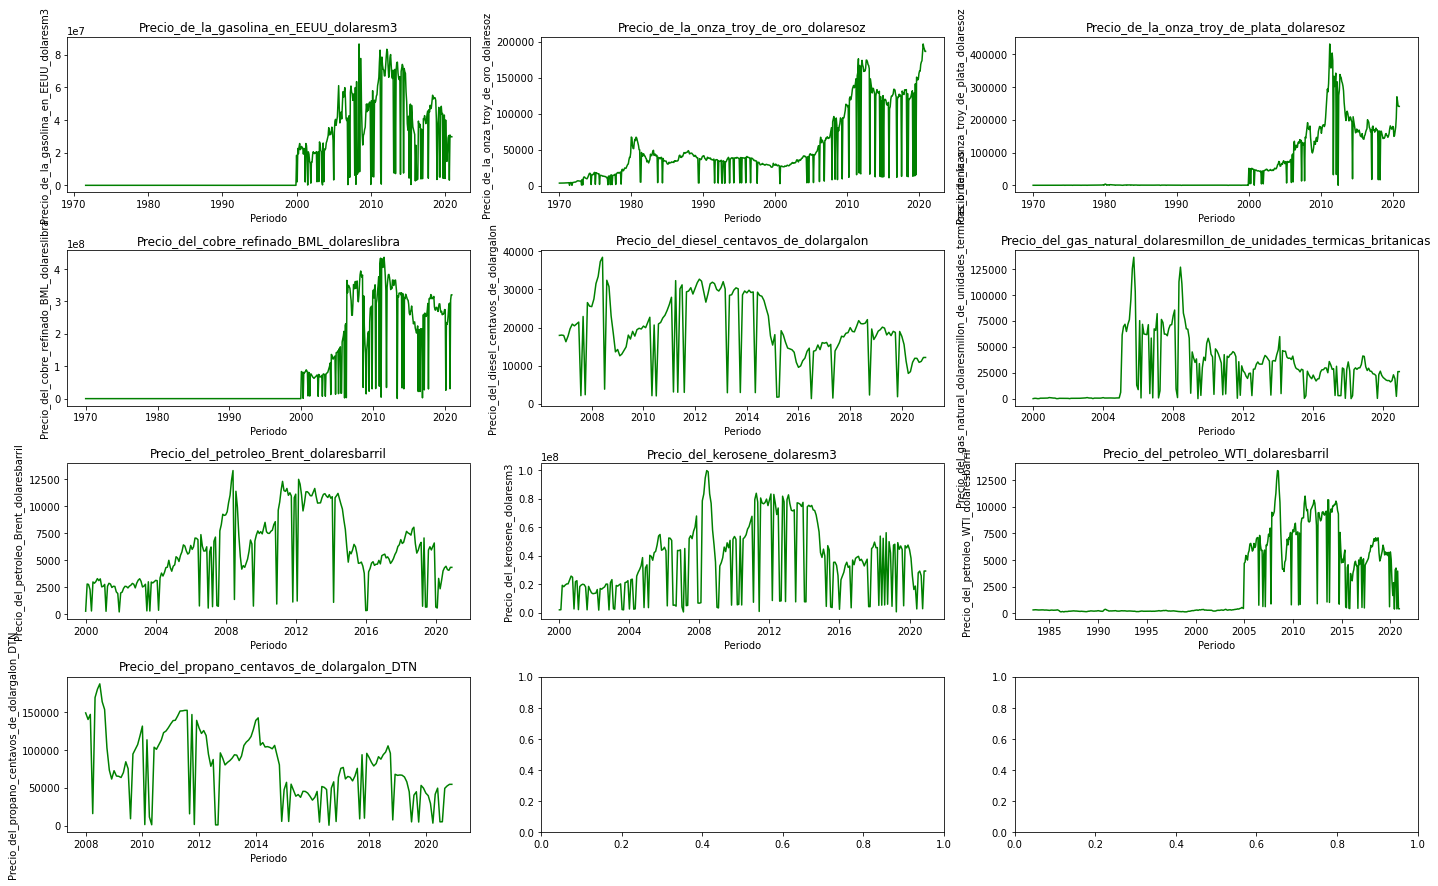

In [22]:
indice = filled_dataset.columns.str.startswith("Precio")
fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(20,12))
ax = ax.flatten()

for i,col in  enumerate(filled_dataset.columns[indice]):
    temp = filled_dataset.loc[:, ['Periodo', col]].sort_values('Periodo')
    sns.lineplot(data=temp, x="Periodo", y=col, ax=ax[i], color="green")
    ax[i].set_title(col)

plt.tight_layout()

### 3. Visualizaciones

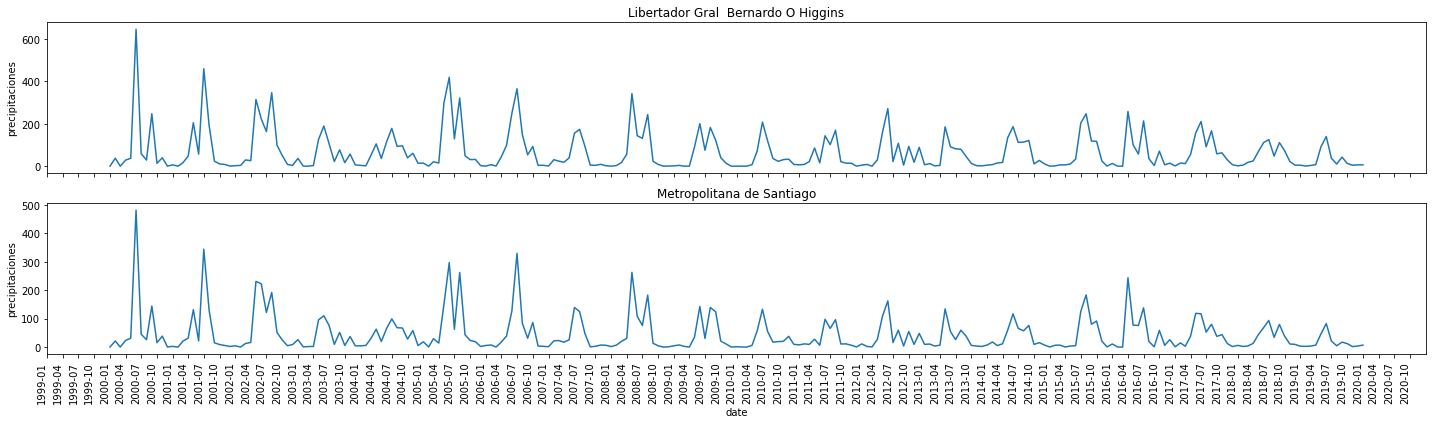

In [23]:
import matplotlib.dates as mdates
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(20,6))
ax = ax.flatten()

for i, region in enumerate(['Libertador_Gral__Bernardo_O_Higgins', 'Metropolitana_de_Santiago']):
    utils.plot_line_precipitaciones(precipitaciones_long, region=region, desde="2000-01-01", hasta="2020-01-01", ax=ax[i])
    ax[i].xaxis.set_major_locator(mdates.MonthLocator(interval=3))
fig.autofmt_xdate(rotation=90)
plt.tight_layout()

Podemos ver comportamientos similares entre las series donde:
- las precipitaciones suelen encontrar picos entre Junio/Julio y Octubre para luego tener épocas más secas durante el verano y otoño. (estacionalidad)
- no se ve una tendencia fuerte en ninguna dirección a nivel general pero sí una disminución paulatina de los picos máaximos a medida que pasan los años aunque parece más estable desde 2015 (tendencia)

Notar que las escalas son distintas y se ve que Santiago tiene picos con menor canitdad de precipitaciones

In [24]:
precipitaciones_long

,date,region,precipitaciones
0,1989-02-01,Coquimbo,0.719033
1,1998-10-01,Coquimbo,0.065216
2,2001-02-01,Coquimbo,2.030026
3,2008-11-01,Coquimbo,0.622784
4,2009-04-01,Coquimbo,0.008065
...,...,...,...
3963,1988-10-01,Los_Rios,181.879767
3964,2019-08-01,Los_Rios,233.621020
3965,2015-06-01,Los_Rios,386.836253
3966,2016-09-01,Los_Rios,119.114419


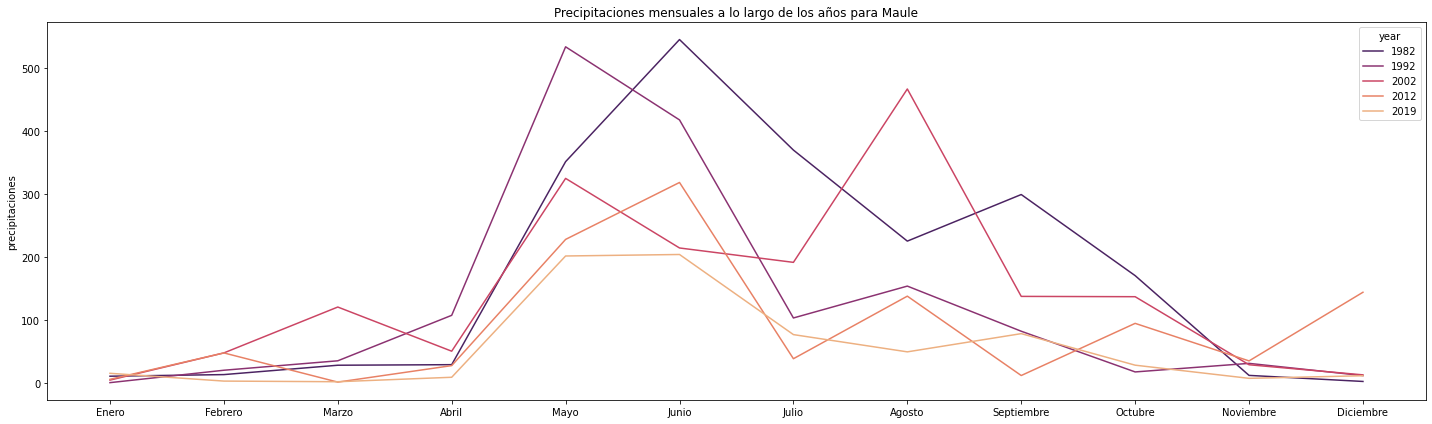

In [25]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,6))

years = [1982,1992,2002,2012,2019]
utils.plot_precipitaciones_mensuales(precipitaciones_long, region="Maule", years=years, ax=ax)

plt.tight_layout();

A los largo de las últimas décadas el volumen de precipitaciones en Maule disminuyó notoriamente. Esto se ve marcadamenete de Abril a Octubre donde a pesar de haber variaciones está claro que las dos series más recientes tienden a estar por debajo del resto. En las épocas más secas es un poco menos claro este efecto pero el volumen de lluvia es mucho menor en ese lapso.

In [26]:
banco_central_long = pd.melt(banco_central_clean, id_vars="Periodo", var_name="variable", value_name="valor")


D:\Programas\Anaconda\envs\kueski\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


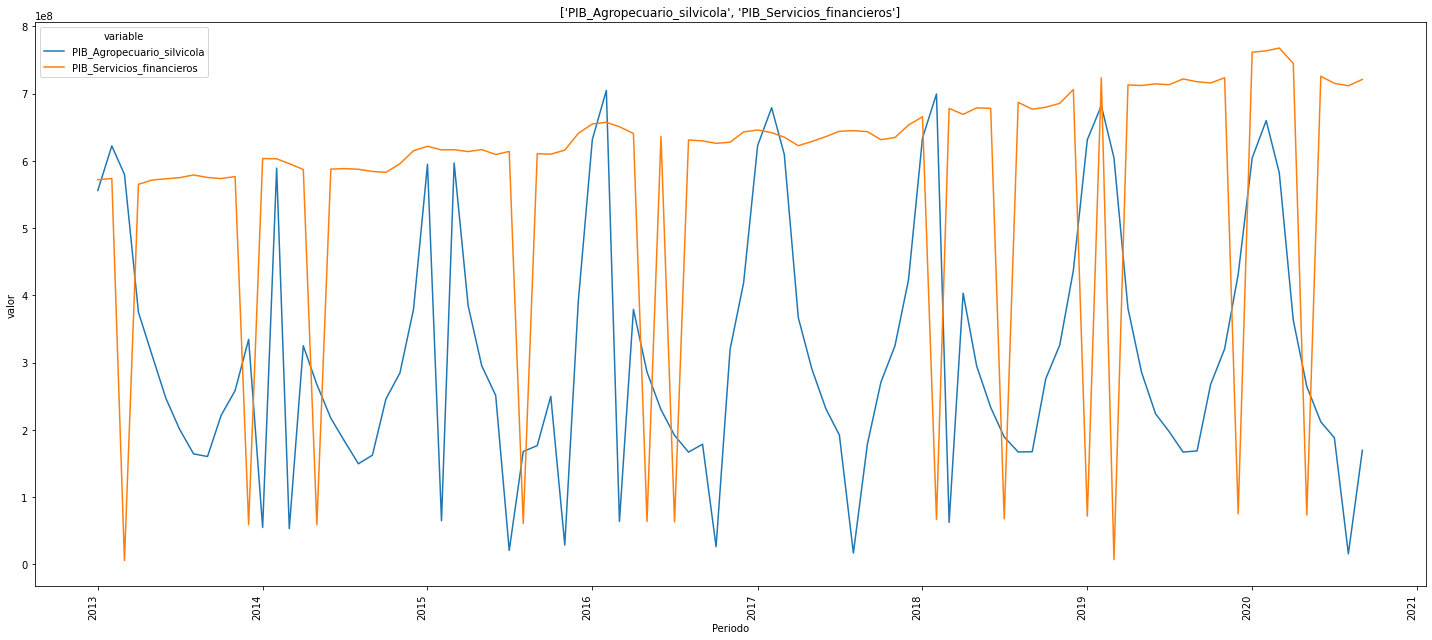

In [27]:
# validar que este bien, emprolijar
fig, ax = plt.subplots(1,1, figsize=(20,9))
utils.plot_pbi(banco_central_long, series=['PIB_Agropecuario_silvicola','PIB_Servicios_financieros'], desde="2013-01-01", hasta="2022-01-01", ax=ax)

fig.autofmt_xdate(rotation=90)
plt.tight_layout()

La serie de servicios financieros parece tener una tendencia alcista a los largo de los años pero resenta caídas fuertes puntuales con cierta recurrencia (podría llegar a ser problemas en los datos también.)  
La serie de PIB agropecuario-silvícola presenta una estacionalidad muy marcada con los picos más grandes en los primeros meses del año. No parece haber una tendencia clara pero los picos de los últimos años son mayores que los de 2013-2015.  
No se ve una relación clara entre las series.

### 4. Tratamiento y creación de variables

Al ser todas variables numéricas continuas uno puede calcular los coeficientes de correlación de a pares, siempre y cuando respeten el mismo ordenamiento de fechas.
Tanto Pearson como Spearman son válidas para este escenario, la primera mide correlación lineal mientras que la segunda mira correlación de rankings y permite captar otro tipo de asociaciones.
El impacto depende del modelo seleccionado pero idealmente se busca baja correlación entre los predictores para facilitar el entrenamiento (problemas numéricos, de interpretación, etc), es decir,  no suma tener dos variables que proveen la misma información.  
Tener series con comportamientos distintos puede aportar de distintas maneras a la predicción de nuestra serie target.
Por otro lado, tener una serie que correlacione bien con nuestra serie target es siempre útil porque ya nos da mucha información acerca de lo que queremos predecir.

In [28]:
leche = pd.read_csv("precio_leche.csv")
leche.rename(columns={'Anio':'anio',
                       'Mes':'mes_abr'}, inplace=True)
leche['mes'] = leche['mes_abr'].apply(lambda x: np.select(
        condlist=[x=='Ene', x=='Feb', x=='Mar', x=='Abr', x=='May', x=='Jun', x=='Jul', x=='Ago', x=='Sep', x=='Oct', x=='Nov', x=='Dic'],
        choicelist= np.arange(1,13),
        default=None))
leche['trimestre'] = pd.to_datetime(leche.mes, format="%m").dt.quarter        
leche.head(10)


,anio,mes_abr,Precio_leche,mes,trimestre
0,1979,Ene,3.85,1,1
1,1979,Feb,4.58,2,1
2,1979,Mar,5.18,3,1
3,1979,Abr,6.06,4,2
4,1979,May,7.25,5,2
5,1979,Jun,7.71,6,2
6,1979,Jul,8.10,7,3
7,1979,Ago,7.65,8,3
8,1979,Sep,6.96,9,3
9,1979,Oct,5.79,10,4


In [415]:
# merge
df_full = leche.merge(precipitaciones, how='left', on=['anio','mes']).merge(banco_central_clean, how='left', on=['anio', 'mes'])
df_full.head()

,anio,mes_abr,Precio_leche,mes,trimestre,date,Coquimbo,Valparaiso,Metropolitana_de_Santiago,Libertador_Gral__Bernardo_O_Higgins,Maule,Biobio,La_Araucania,Los_Rios,Periodo,Imacec_empalmado,Imacec_produccion_de_bienes,Imacec_minero,Imacec_industria,Imacec_resto_de_bienes,Imacec_comercio,Imacec_servicios,Imacec_a_costo_de_factores,Imacec_no_minero,PIB_Agropecuario_silvicola,PIB_Pesca,PIB_Mineria,PIB_Mineria_del_cobre,PIB_Otras_actividades_mineras,PIB_Industria_Manufacturera,PIB_Alimentos,PIB_Bebidas_y_tabaco,PIB_Textil,PIB_Maderas_y_muebles,PIB_Celulosa,PIB_Refinacion_de_petroleo,PIB_Quimica,PIB_Minerales_no_metalicos_y_metalica_basica,PIB_Productos_metalicos,PIB_Electricidad,PIB_Construccion,PIB_Comercio,PIB_Restaurantes_y_hoteles,PIB_Transporte,PIB_Comunicaciones,PIB_Servicios_financieros,PIB_Servicios_empresariales,PIB_Servicios_de_vivienda,PIB_Servicios_personales,PIB_Administracion_publica,PIB_a_costo_de_factores,Impuesto_al_valor_agregado,Derechos_de_Importacion,PIB,Precio_de_la_gasolina_en_EEUU_dolaresm3,Precio_de_la_onza_troy_de_oro_dolaresoz,Precio_de_la_onza_troy_de_plata_dolaresoz,Precio_del_cobre_refinado_BML_dolareslibra,Precio_del_diesel_centavos_de_dolargalon,Precio_del_gas_natural_dolaresmillon_de_unidades_termicas_britanicas,Precio_del_petroleo_Brent_dolaresbarril,Precio_del_kerosene_dolaresm3,Precio_del_petroleo_WTI_dolaresbarril,Precio_del_propano_centavos_de_dolargalon_DTN,Tipo_de_cambio_del_dolar_observado_diario,Ocupados,Ocupacion_en_Agricultura_INE,Ocupacion_en_Explotacion_de_minas_y_canteras_INE,Ocupacion_en_Industrias_manufactureras_INE,Ocupacion_en_Suministro_de_electricidad_INE,Ocupacion_en_Actividades_de_servicios_administrativos_y_de_apoyo_INE,Ocupacion_en_Actividades_profesionales_INE,Ocupacion_en_Actividades_inmobiliarias_INE,Ocupacion_en_Actividades_financieras_y_de_seguros_INE,Ocupacion_en_Informacion_y_comunicaciones_INE,Ocupacion_en_Transporte_y_almacenamiento_INE,Ocupacion_en_Actividades_de_alojamiento_y_de_servicio_de_comidas_INE,Ocupacion_en_Construccion_INE,Ocupacion_en_Comercio_INE,Ocupacion_en_Suministro_de_agua_evacuacion_de_aguas_residuales_INE,Ocupacion_en_Administracion_publica_y_defensa_INE,Ocupacion_en_Enseanza_INE,Ocupacion_en_Actividades_de_atencion_de_la_salud_humana_y_de_asistencia_social_INE,Ocupacion_en_Actividades_artisticas_INE,Ocupacion_en_Otras_actividades_de_servicios_INE,Ocupacion_en_Actividades_de_los_hogares_como_empleadores_INE,Ocupacion_en_Actividades_de_organizaciones_y_organos_extraterritoriales_INE,No_sabe__No_responde_Miles_de_personas,Tipo_de_cambio_nominal_multilateral___TCM,Indice_de_tipo_de_cambio_real___TCR_promedio_1986_100,Indice_de_produccion_industrial,Indice_de_produccion_industrial__mineria,Indice_de_produccion_industrial_electricidad__gas_y_agua,Indice_de_produccion_industrial__manufacturera,Generacion_de_energia_electrica_CDEC_GWh,Indice_de_ventas_comercio_real_IVCM,Indice_de_ventas_comercio_real_no_durables_IVCM,Indice_de_ventas_comercio_real_durables_IVCM,Ventas_autos_nuevos
0,1979,Ene,3.85,1,1,1979-01-01,2.641948,0.587062,2.447114,1.608992,3.736215,17.859634,25.212940,45.596447,1979-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13672.0,22727.0,626.0,752.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1979,Feb,4.58,2,1,1979-02-01,1.179804,2.432192,3.997852,4.346310,16.347637,17.680612,18.085072,34.075039,1979-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16713.0,24567.0,742.0,882.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1979,Mar,5.18,3,1,1979-03-01,0.255490,0.020601,0.000000,0.05

In [30]:
# Correlacion
corr = df_full.corr()
corr_reduced = corr.reset_index().melt(id_vars="index", value_name='corr').query('corr < 1 and corr > -1').sort_values('corr')

In [31]:
corr_reduced['combined'] = corr_reduced['index'] + corr_reduced.variable
corr_reduced['combined_to_drop'] =  corr_reduced.apply(lambda x: "".join(sorted(list(x.combined))), axis=1)
corr_reduced = corr_reduced.drop_duplicates('combined_to_drop')
corr_reduced = corr_reduced[['index', 'variable', 'corr']]

In [32]:
corr_reduced

,index,variable,corr
8070,Metropolitana_de_Santiago,No_sabe__No_responde_Miles_de_personas,-0.949799
564,No_sabe__No_responde_Miles_de_personas,Valparaiso,-0.948845
756,No_sabe__No_responde_Miles_de_personas,Libertador_Gral__Bernardo_O_Higgins,-0.901976
852,No_sabe__No_responde_Miles_de_personas,Maule,-0.850002
1044,No_sabe__No_responde_Miles_de_personas,La_Araucania,-0.823791
...,...,...,...
874,La_Araucania,Biobio,0.970236
290,mes,trimestre,0.971780
96,anio,Precio_leche,0.973218
1066,La_Araucania,Los_Rios,0.974393


In [33]:
# Correlacion con target
corr_reduced.query('index == "Precio_leche" or variable=="Precio_leche"').sort_values('corr', ascending=False).head(25)

,index,variable,corr
96,anio,Precio_leche,0.973218
5089,Precio_leche,Precio_de_la_onza_troy_de_plata_dolaresoz,0.788014
150,Precio_del_cobre_refinado_BML_dolareslibra,Precio_leche,0.787816
147,Precio_de_la_gasolina_en_EEUU_dolaresm3,Precio_leche,0.690898
5665,Precio_leche,Precio_del_petroleo_WTI_dolaresbarril,0.689660
4993,Precio_leche,Precio_de_la_onza_troy_de_oro_dolaresoz,0.687773
5473,Precio_leche,Precio_del_petroleo_Brent_dolaresbarril,0.352386
5569,Precio_leche,Precio_del_kerosene_dolaresm3,0.304530
182,Indice_de_tipo_de_cambio_real___TCR_promedio_1...,Precio_leche,0.276890
7297,Precio_leche,Ocupacion_en_Suministro_de_agua_evacuacion_de_...,0.276595


In [224]:
corr_reduced.query('index == "Precio_leche" or variable=="Precio_leche"').sort_values('corr', ascending=True).head(25)

,index,variable,corr
125,PIB_Textil,Precio_leche,-0.356306
178,Ocupacion_en_Actividades_de_los_hogares_como_e...,Precio_leche,-0.356034
7969,Precio_leche,Ocupacion_en_Actividades_de_organizaciones_y_o...,-0.334008
1729,Precio_leche,Imacec_servicios,-0.328865
1825,Precio_leche,Imacec_a_costo_de_factores,-0.322728
156,Precio_del_propano_centavos_de_dolargalon_DTN,Precio_leche,-0.307485
2209,Precio_leche,PIB_Mineria,-0.306173
110,Imacec_minero,Precio_leche,-0.304745
159,Ocupacion_en_Agricultura_INE,Precio_leche,-0.297058
108,Imacec_empalmado,Precio_leche,-0.257372


<AxesSubplot:>

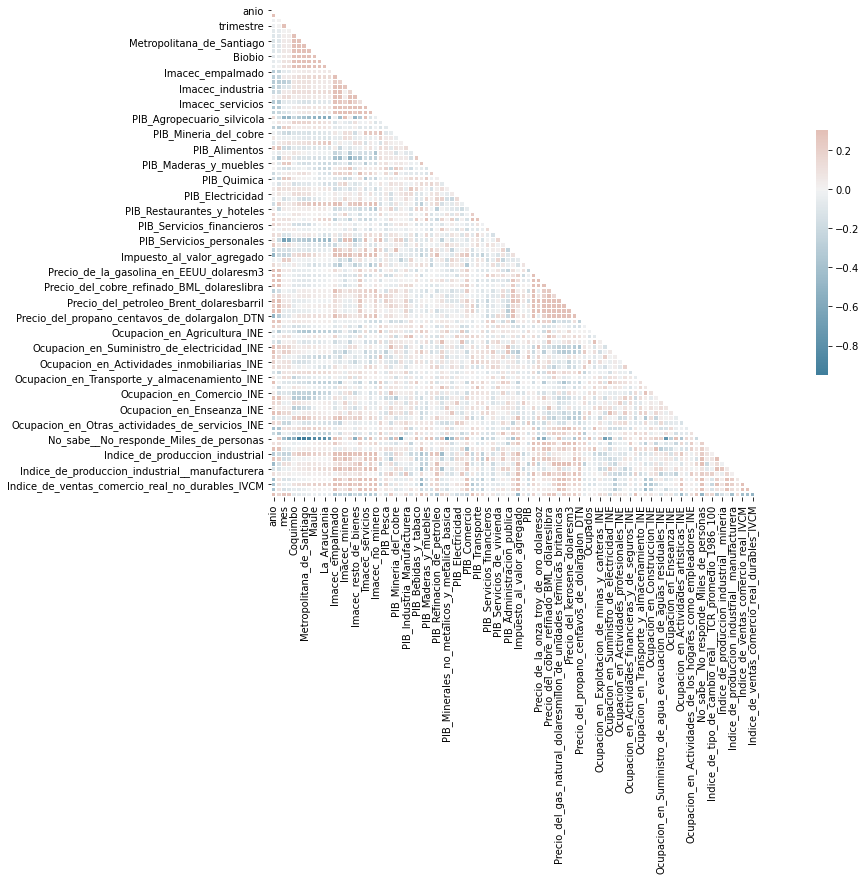

In [34]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(20, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

No es una visualización detallada por la alta cantidad de variables pero a nivel grupo se puede observar que las variables de ciertos grupos como Precipitaciones,  Imacec, Precios y los indices correlactiona positivamente entre sí - es decir, al interior de cada grupo. Es decir que cada grupo presenta movimientos más o menos similares entre sus series.  
Por otra parte los PIB y ocupacion son mas disímiles. Puede deberse a la independencia de alguna manera entre sectores y estacionalidades.

#### Generación de variables

In [416]:
def mean_rating_window(df, var, window, min_periods):
    """ Calculates simple moving average over desired windows  
     Shift() to not use current record.
    """
    new_feature = df.sort_values('date')[var].rolling(
        window, min_periods=min_periods)\
        .mean()\
        .reset_index(level=0)[var]
    return new_feature



def exponential_cumulative_mean(df,  var, alpha):
    """ Calculates exponential average. 
     Shift() to not use current record. """
    new_feature = df.sort_values('date')[var]\
        .ewm(alpha=alpha)\
        .mean()\
        .reset_index(level=0)[var]
    return new_feature


In [417]:
# medias móviles
for i in range(1,10,3):
    df_full["mean_price_" + str(i)] = mean_rating_window(df_full,  'Precio_leche', i, 1)

In [418]:
# Exponential average
df_full['exp_cumulative_mean'] = exponential_cumulative_mean(df_full, 'Precio_leche', 0.9)

In [419]:
df_full.tail(10)

,anio,mes_abr,Precio_leche,mes,trimestre,date,Coquimbo,Valparaiso,Metropolitana_de_Santiago,Libertador_Gral__Bernardo_O_Higgins,Maule,Biobio,La_Araucania,Los_Rios,Periodo,Imacec_empalmado,Imacec_produccion_de_bienes,Imacec_minero,Imacec_industria,Imacec_resto_de_bienes,Imacec_comercio,Imacec_servicios,Imacec_a_costo_de_factores,Imacec_no_minero,PIB_Agropecuario_silvicola,PIB_Pesca,PIB_Mineria,PIB_Mineria_del_cobre,PIB_Otras_actividades_mineras,PIB_Industria_Manufacturera,PIB_Alimentos,PIB_Bebidas_y_tabaco,PIB_Textil,PIB_Maderas_y_muebles,PIB_Celulosa,PIB_Refinacion_de_petroleo,PIB_Quimica,PIB_Minerales_no_metalicos_y_metalica_basica,PIB_Productos_metalicos,PIB_Electricidad,PIB_Construccion,PIB_Comercio,PIB_Restaurantes_y_hoteles,PIB_Transporte,PIB_Comunicaciones,PIB_Servicios_financieros,PIB_Servicios_empresariales,PIB_Servicios_de_vivienda,PIB_Servicios_personales,PIB_Administracion_publica,...,PIB,Precio_de_la_gasolina_en_EEUU_dolaresm3,Precio_de_la_onza_troy_de_oro_dolaresoz,Precio_de_la_onza_troy_de_plata_dolaresoz,Precio_del_cobre_refinado_BML_dolareslibra,Precio_del_diesel_centavos_de_dolargalon,Precio_del_gas_natural_dolaresmillon_de_unidades_termicas_britanicas,Precio_del_petroleo_Brent_dolaresbarril,Precio_del_kerosene_dolaresm3,Precio_del_petroleo_WTI_dolaresbarril,Precio_del_propano_centavos_de_dolargalon_DTN,Tipo_de_cambio_del_dolar_observado_diario,Ocupados,Ocupacion_en_Agricultura_INE,Ocupacion_en_Explotacion_de_minas_y_canteras_INE,Ocupacion_en_Industrias_manufactureras_INE,Ocupacion_en_Suministro_de_electricidad_INE,Ocupacion_en_Actividades_de_servicios_administrativos_y_de_apoyo_INE,Ocupacion_en_Actividades_profesionales_INE,Ocupacion_en_Actividades_inmobiliarias_INE,Ocupacion_en_Actividades_financieras_y_de_seguros_INE,Ocupacion_en_Informacion_y_comunicaciones_INE,Ocupacion_en_Transporte_y_almacenamiento_INE,Ocupacion_en_Actividades_de_alojamiento_y_de_servicio_de_comidas_INE,Ocupacion_en_Construccion_INE,Ocupacion_en_Comercio_INE,Ocupacion_en_Suministro_de_agua_evacuacion_de_aguas_residuales_INE,Ocupacion_en_Administracion_publica_y_defensa_INE,Ocupacion_en_Enseanza_INE,Ocupacion_en_Actividades_de_atencion_de_la_salud_humana_y_de_asistencia_social_INE,Ocupacion_en_Actividades_artisticas_INE,Ocupacion_en_Otras_actividades_de_servicios_INE,Ocupacion_en_Actividades_de_los_hogares_como_empleadores_INE,Ocupacion_en_Actividades_de_organizaciones_y_organos_extraterritoriales_INE,No_sabe__No_responde_Miles_de_personas,Tipo_de_cambio_nominal_multilateral___TCM,Indice_de_tipo_de_cambio_real___TCR_promedio_1986_100,Indice_de_produccion_industrial,Indice_de_produccion_industrial__mineria,Indice_de_produccion_industrial_electricidad__gas_y_agua,Indice_de_produccion_industrial__manufacturera,Generacion_de_energia_electrica_CDEC_GWh,Indice_de_ventas_comercio_real_IVCM,Indice_de_ventas_comercio_real_no_durables_IVCM,Indice_de_ventas_comercio_real_durables_IVCM,Ventas_autos_nuevos,mean_price_1,mean_price_4,mean_price_7,exp_cumulative_mean
496,2020,May,318.88,5,2,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-05-01,982393209.0,969940132.0,106092921.0,937147742.0,924598764.0,893637866.0,101805244.0,987747993.0,972149892.0,264429326.0,769691397.0,133886862.0,121485818.0,125283759.0,119686895.0,361867184.0,141059226.0,132664027.0,571279002.0,961403029.0,778932805.0,176895311.0,539645822.0,201919475.0,328455565.0,647732648.0,932050616.0,109895312.0,424641442.0,407589319.0,73505771.0,112884156.0,908922124.0,131280057.0,609511858.0,...,112873882.0,22116182.0,171866.0,163103.0,237404518.0,8416.0,17525.0,3102.0,18583828.0,2856.0,41538.0,821805263.0,745052256.0,508863831.0,201025179.0,754474506.0,482632655.0,251716753.0,254917024.0,632806344.0,194986018.0,155482912.0,476160169.0,251956752.0,585938797.0,139444452.0,623751806.0,482946404.0,70325575.0,509662247.0,632411811.0,255401389.0,22601784.0,0.0,611221631.0,116033158.0,101774069.0,974478672.0,100006637.0,106233534.0,928877962.0,64062.0,843783483.0,836117127.0,876143273.0,86810.0,318.88,2

In [420]:
# agregar mas variables?

### 5. Modelo


<AxesSubplot:xlabel='anio', ylabel='Precio_leche'>

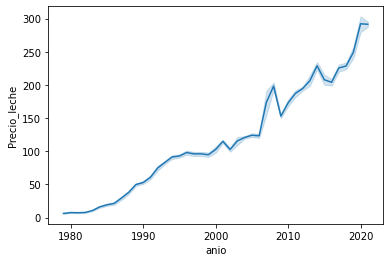

In [421]:
fig, ax = plt.subplots(nrows=1, ncols=1)

sns.lineplot(data=leche, x="anio", y='Precio_leche')

In [422]:
df_full.sort_values('Periodo', ascending=False).head(5)

,anio,mes_abr,Precio_leche,mes,trimestre,date,Coquimbo,Valparaiso,Metropolitana_de_Santiago,Libertador_Gral__Bernardo_O_Higgins,Maule,Biobio,La_Araucania,Los_Rios,Periodo,Imacec_empalmado,Imacec_produccion_de_bienes,Imacec_minero,Imacec_industria,Imacec_resto_de_bienes,Imacec_comercio,Imacec_servicios,Imacec_a_costo_de_factores,Imacec_no_minero,PIB_Agropecuario_silvicola,PIB_Pesca,PIB_Mineria,PIB_Mineria_del_cobre,PIB_Otras_actividades_mineras,PIB_Industria_Manufacturera,PIB_Alimentos,PIB_Bebidas_y_tabaco,PIB_Textil,PIB_Maderas_y_muebles,PIB_Celulosa,PIB_Refinacion_de_petroleo,PIB_Quimica,PIB_Minerales_no_metalicos_y_metalica_basica,PIB_Productos_metalicos,PIB_Electricidad,PIB_Construccion,PIB_Comercio,PIB_Restaurantes_y_hoteles,PIB_Transporte,PIB_Comunicaciones,PIB_Servicios_financieros,PIB_Servicios_empresariales,PIB_Servicios_de_vivienda,PIB_Servicios_personales,PIB_Administracion_publica,...,PIB,Precio_de_la_gasolina_en_EEUU_dolaresm3,Precio_de_la_onza_troy_de_oro_dolaresoz,Precio_de_la_onza_troy_de_plata_dolaresoz,Precio_del_cobre_refinado_BML_dolareslibra,Precio_del_diesel_centavos_de_dolargalon,Precio_del_gas_natural_dolaresmillon_de_unidades_termicas_britanicas,Precio_del_petroleo_Brent_dolaresbarril,Precio_del_kerosene_dolaresm3,Precio_del_petroleo_WTI_dolaresbarril,Precio_del_propano_centavos_de_dolargalon_DTN,Tipo_de_cambio_del_dolar_observado_diario,Ocupados,Ocupacion_en_Agricultura_INE,Ocupacion_en_Explotacion_de_minas_y_canteras_INE,Ocupacion_en_Industrias_manufactureras_INE,Ocupacion_en_Suministro_de_electricidad_INE,Ocupacion_en_Actividades_de_servicios_administrativos_y_de_apoyo_INE,Ocupacion_en_Actividades_profesionales_INE,Ocupacion_en_Actividades_inmobiliarias_INE,Ocupacion_en_Actividades_financieras_y_de_seguros_INE,Ocupacion_en_Informacion_y_comunicaciones_INE,Ocupacion_en_Transporte_y_almacenamiento_INE,Ocupacion_en_Actividades_de_alojamiento_y_de_servicio_de_comidas_INE,Ocupacion_en_Construccion_INE,Ocupacion_en_Comercio_INE,Ocupacion_en_Suministro_de_agua_evacuacion_de_aguas_residuales_INE,Ocupacion_en_Administracion_publica_y_defensa_INE,Ocupacion_en_Enseanza_INE,Ocupacion_en_Actividades_de_atencion_de_la_salud_humana_y_de_asistencia_social_INE,Ocupacion_en_Actividades_artisticas_INE,Ocupacion_en_Otras_actividades_de_servicios_INE,Ocupacion_en_Actividades_de_los_hogares_como_empleadores_INE,Ocupacion_en_Actividades_de_organizaciones_y_organos_extraterritoriales_INE,No_sabe__No_responde_Miles_de_personas,Tipo_de_cambio_nominal_multilateral___TCM,Indice_de_tipo_de_cambio_real___TCR_promedio_1986_100,Indice_de_produccion_industrial,Indice_de_produccion_industrial__mineria,Indice_de_produccion_industrial_electricidad__gas_y_agua,Indice_de_produccion_industrial__manufacturera,Generacion_de_energia_electrica_CDEC_GWh,Indice_de_ventas_comercio_real_IVCM,Indice_de_ventas_comercio_real_no_durables_IVCM,Indice_de_ventas_comercio_real_durables_IVCM,Ventas_autos_nuevos,mean_price_1,mean_price_4,mean_price_7,exp_cumulative_mean
503,2020,Dic,287.29,12,4,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-01,NaN,NaN,NaN,NaN,NaN,803222345.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,114754323.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203443234.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,893234345.0,NaN,287.29,282.1725,295.312857,287.240056
502,2020,Nov,288.09,11,4,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,29756846.0,186635.0,240693.0,320395083.0,12139.0,26087.0,4323.0,29146544.0,411.0,54664.0,762884762.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11201619.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,294860.0,288.09,287.7100,299.825714,286.790563
501,2020,Oct,274.32,10,4,NaT

In [423]:
# columnas = ['Precio_leche', 'anio', 'mes', 'trimestre', 'Imacec_empalmado', 'PIB', 'PIB_Alimentos',"Indice_de_tipo_de_cambio_real___TCR_promedio_1986_100", "Indice_de_produccion_industrial__manufacturera"] + list(df_full.columns[df_full.columns.str.startswith("Precio")].values) 
# df_model = df_full.loc[:, columnas]

In [424]:
df_full.columns.values

array(['anio', 'mes_abr', 'Precio_leche', 'mes', 'trimestre', 'date',
       'Coquimbo', 'Valparaiso', 'Metropolitana_de_Santiago',
       'Libertador_Gral__Bernardo_O_Higgins', 'Maule', 'Biobio',
       'La_Araucania', 'Los_Rios', 'Periodo', 'Imacec_empalmado',
       'Imacec_produccion_de_bienes', 'Imacec_minero', 'Imacec_industria',
       'Imacec_resto_de_bienes', 'Imacec_comercio', 'Imacec_servicios',
       'Imacec_a_costo_de_factores', 'Imacec_no_minero',
       'PIB_Agropecuario_silvicola', 'PIB_Pesca', 'PIB_Mineria',
       'PIB_Mineria_del_cobre', 'PIB_Otras_actividades_mineras',
       'PIB_Industria_Manufacturera', 'PIB_Alimentos',
       'PIB_Bebidas_y_tabaco', 'PIB_Textil', 'PIB_Maderas_y_muebles',
       'PIB_Celulosa', 'PIB_Refinacion_de_petroleo', 'PIB_Quimica',
       'PIB_Minerales_no_metalicos_y_metalica_basica',
       'PIB_Productos_metalicos', 'PIB_Electricidad', 'PIB_Construccion',
       'PIB_Comercio', 'PIB_Restaurantes_y_hoteles', 'PIB_Transporte',
       'PI

In [588]:
columnas = ['Precio_leche','anio', 'mes', 'trimestre'] + list(df_full.columns[df_full.columns.str.startswith("mean")].values)
# columnas = ['Precio_leche','anio', 'mes', 'trimestre'] + list(df_full.columns[df_full.columns.str.startswith("mean")].values)  + list(df_full.columns[df_full.columns.str.startswith("exp_")].values) +  list(df_full.columns[df_full.columns.str.startswith("Precio_de")].values) + [ "Indice_de_tipo_de_cambio_real___TCR_promedio_1986_100", "PIB_Alimentos", "Imacec_servicios", "Ocupacion_en_Agricultura_INE"]
# df_model = df_full.drop(columns=['mes_abr', 'date', 'Periodo', "No_sabe__No_responde_Miles_de_personas"])
df_model = df_full.loc[:, columnas]
df_model['trend'] = np.arange(0, df_model.shape[0]) 
df_model[['Precio_leche', 'anio', 'mes', 'trimestre']] = df_model[['Precio_leche', 'anio', 'mes', 'trimestre']].shift(-1)


In [589]:
df_full.sort_values(['anio', 'mes'], ascending=False).head()

,anio,mes_abr,Precio_leche,mes,trimestre,date,Coquimbo,Valparaiso,Metropolitana_de_Santiago,Libertador_Gral__Bernardo_O_Higgins,Maule,Biobio,La_Araucania,Los_Rios,Periodo,Imacec_empalmado,Imacec_produccion_de_bienes,Imacec_minero,Imacec_industria,Imacec_resto_de_bienes,Imacec_comercio,Imacec_servicios,Imacec_a_costo_de_factores,Imacec_no_minero,PIB_Agropecuario_silvicola,PIB_Pesca,PIB_Mineria,PIB_Mineria_del_cobre,PIB_Otras_actividades_mineras,PIB_Industria_Manufacturera,PIB_Alimentos,PIB_Bebidas_y_tabaco,PIB_Textil,PIB_Maderas_y_muebles,PIB_Celulosa,PIB_Refinacion_de_petroleo,PIB_Quimica,PIB_Minerales_no_metalicos_y_metalica_basica,PIB_Productos_metalicos,PIB_Electricidad,PIB_Construccion,PIB_Comercio,PIB_Restaurantes_y_hoteles,PIB_Transporte,PIB_Comunicaciones,PIB_Servicios_financieros,PIB_Servicios_empresariales,PIB_Servicios_de_vivienda,PIB_Servicios_personales,PIB_Administracion_publica,...,PIB,Precio_de_la_gasolina_en_EEUU_dolaresm3,Precio_de_la_onza_troy_de_oro_dolaresoz,Precio_de_la_onza_troy_de_plata_dolaresoz,Precio_del_cobre_refinado_BML_dolareslibra,Precio_del_diesel_centavos_de_dolargalon,Precio_del_gas_natural_dolaresmillon_de_unidades_termicas_britanicas,Precio_del_petroleo_Brent_dolaresbarril,Precio_del_kerosene_dolaresm3,Precio_del_petroleo_WTI_dolaresbarril,Precio_del_propano_centavos_de_dolargalon_DTN,Tipo_de_cambio_del_dolar_observado_diario,Ocupados,Ocupacion_en_Agricultura_INE,Ocupacion_en_Explotacion_de_minas_y_canteras_INE,Ocupacion_en_Industrias_manufactureras_INE,Ocupacion_en_Suministro_de_electricidad_INE,Ocupacion_en_Actividades_de_servicios_administrativos_y_de_apoyo_INE,Ocupacion_en_Actividades_profesionales_INE,Ocupacion_en_Actividades_inmobiliarias_INE,Ocupacion_en_Actividades_financieras_y_de_seguros_INE,Ocupacion_en_Informacion_y_comunicaciones_INE,Ocupacion_en_Transporte_y_almacenamiento_INE,Ocupacion_en_Actividades_de_alojamiento_y_de_servicio_de_comidas_INE,Ocupacion_en_Construccion_INE,Ocupacion_en_Comercio_INE,Ocupacion_en_Suministro_de_agua_evacuacion_de_aguas_residuales_INE,Ocupacion_en_Administracion_publica_y_defensa_INE,Ocupacion_en_Enseanza_INE,Ocupacion_en_Actividades_de_atencion_de_la_salud_humana_y_de_asistencia_social_INE,Ocupacion_en_Actividades_artisticas_INE,Ocupacion_en_Otras_actividades_de_servicios_INE,Ocupacion_en_Actividades_de_los_hogares_como_empleadores_INE,Ocupacion_en_Actividades_de_organizaciones_y_organos_extraterritoriales_INE,No_sabe__No_responde_Miles_de_personas,Tipo_de_cambio_nominal_multilateral___TCM,Indice_de_tipo_de_cambio_real___TCR_promedio_1986_100,Indice_de_produccion_industrial,Indice_de_produccion_industrial__mineria,Indice_de_produccion_industrial_electricidad__gas_y_agua,Indice_de_produccion_industrial__manufacturera,Generacion_de_energia_electrica_CDEC_GWh,Indice_de_ventas_comercio_real_IVCM,Indice_de_ventas_comercio_real_no_durables_IVCM,Indice_de_ventas_comercio_real_durables_IVCM,Ventas_autos_nuevos,mean_price_1,mean_price_4,mean_price_7,exp_cumulative_mean
505,2021,Feb,295.24,2,1,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,295.24,289.5550,288.710000,294.472401
504,2021,Ene,287.60,1,1,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,287.60,284.3250,291.290000,287.564006
503,2020,Dic,287.29,12,4,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-01,NaN,NaN,NaN,NaN,NaN,803222345.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,114754323.0,N

In [590]:
df_model.sort_values(['anio', 'mes'], ascending=False).head(20)

,Precio_leche,anio,mes,trimestre,mean_price_1,mean_price_4,mean_price_7,trend
504,295.24,2021.0,2.0,1.0,287.60,284.3250,291.290000,504
503,287.60,2021.0,1.0,1.0,287.29,282.1725,295.312857,503
502,287.29,2020.0,12.0,4.0,288.09,287.7100,299.825714,502
501,288.09,2020.0,11.0,4.0,274.32,294.0125,303.848571,501
500,274.32,2020.0,10.0,4.0,278.99,304.3725,304.642857,500
499,278.99,2020.0,9.0,3.0,309.44,314.3450,303.380000,499
498,309.44,2020.0,8.0,3.0,313.30,316.0475,295.474286,498
497,313.30,2020.0,7.0,3.0,315.76,307.6925,286.982857,497
496,315.76,2020.0,6.0,2.0,318.88,296.2900,277.762857,496
495,318.88,2020.0,5.0,2.0,316.25,280.0950,266.985714,495


In [591]:
df_model.dropna().anio.apply(['min', 'max'])

min    1979.0
max    2021.0
Name: anio, dtype: float64

In [592]:
train_init = 2014
val_init = 2019

train = df_model.loc[(df_model.anio >= train_init) & (df_model.anio < val_init),:].dropna()
val = df_model.loc[(df_model.anio >= val_init) & (df_model.anio < 2021),:].dropna()
# assert train.shape[0] + val.shape[0] == df_model.shape[0]

In [593]:
val.tail()

,Precio_leche,anio,mes,trimestre,mean_price_1,mean_price_4,mean_price_7,trend
498,309.44,2020.0,8.0,3.0,313.30,316.0475,295.474286,498
499,278.99,2020.0,9.0,3.0,309.44,314.3450,303.380000,499
500,274.32,2020.0,10.0,4.0,278.99,304.3725,304.642857,500
501,288.09,2020.0,11.0,4.0,274.32,294.0125,303.848571,501
502,287.29,2020.0,12.0,4.0,288.09,287.7100,299.825714,502


In [594]:


y = train['Precio_leche']
X = train.drop(columns='Precio_leche')
assert X.shape[0] == len(y)
y_val = val['Precio_leche']
X_val = val.drop(columns="Precio_leche")

In [595]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

In [596]:
# Hacer lasso con pipeline

In [597]:

lasso = Lasso()
scaler = StandardScaler(with_std=False)

In [598]:
X = scaler.fit_transform(X)
m1 = lasso.fit(X, y)

In [599]:
m1.score(X,y)

0.8970429530934517

In [600]:
m1.score(X_val - scaler.mean_, y_val)

0.7638476829606816

In [601]:
from sklearn.metrics import mean_squared_error
import math

In [602]:
math.sqrt(mean_squared_error(y_val, m1.predict(X_val - scaler.mean_)))

13.702552876291398

In [603]:
df = pd.DataFrame({
    'x': range(0,len(y_val)),
    'pred': m1.predict(X_val - scaler.mean_),
                    'truth': y_val})

<AxesSubplot:xlabel='x'>

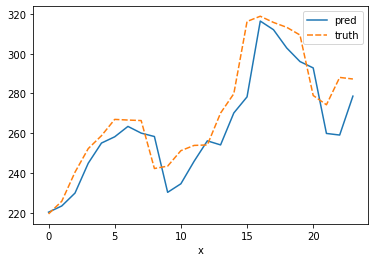

In [604]:
sns.lineplot(data=df.set_index("x"))

#### Train val
Vamos a utilizar una base de train de .. a.. y una base de validacion de .. a..  
Lo importante acá es mantener el ordenamiento temporal dado que queremos predecir el próximo valor. No se puede mezclar los datos.
Otra alternativa posible es hacer crossvalidation donde se toma parte de la data para entrenar y una porcion posterior para validar y nos vamos moviendo asi a lo largo de todo el rango de fechas. Esto mismo puede hacer con LOO (predecir solo la próxima observación) dado que el tamaño de la data no es muy grande.


#### Datos adicionales
Podría servir:
el dato de importación y producción local de leche por período
el precio internacional de la leche o algun proxy


#### Métrica
Nos encontramos en un problema de regresión y por lo tanto hay varias métricas que pueden mirarse como R2, MAPE y MSE.  
La idea de fondo es ver que tan lejos está nuestra predicción del valor real, ya sea utilizando el cuadrado o valores absolutos para evitar que se compensen residuos positivos y negativos. Considero el MAPE una medida bastante intuitiva ya que no depende de la escala y devuelve el porcentaje de error promedio.

In [533]:
#### Aplicacion